<a href="https://colab.research.google.com/github/thunwaaa/sign_language/blob/main/examples/hand_landmarker/python/hand_landmarker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Hand Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect hand landmarks from images.

## Preparation

Let's start with installing MediaPipe.

In [1]:
!pip install protobuf>=5.29.1

In [2]:
!pip install opencv-python tqdm numpy mediapipe

In [ ]:
!pip install mediapipe

In [ ]:
!pip install numpy

Then download an off-the-shelf model bundle. Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/hand_landmarker#models) for more information about this model bundle.

In [3]:
!wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

## Visualization utilities

In [4]:
#@markdown We implemented some functions to visualize the hand landmark detection results. <br/> Run the following cell to activate the functions.

import cv2
import numpy as np
import mediapipe as mp
from mediapipe import solutions

# Setup MediaPipe solutions
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# Constants
MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54)  # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
    hand_landmarks_list = detection_result.multi_hand_landmarks
    handedness_list = detection_result.multi_handedness
    annotated_image = np.copy(rgb_image)

    # Loop through the detected hands to visualize.
    for idx in range(len(hand_landmarks_list)):
        hand_landmarks = hand_landmarks_list[idx]
        handedness = handedness_list[idx]

        # Draw the hand landmarks directly using MediaPipe's drawing utilities
        mp_drawing.draw_landmarks(
            annotated_image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

        # Get the top left corner of the detected hand's bounding box.
        height, width, _ = annotated_image.shape
        x_coordinates = [landmark.x for landmark in hand_landmarks.landmark]
        y_coordinates = [landmark.y for landmark in hand_landmarks.landmark]
        text_x = int(min(x_coordinates) * width)
        text_y = int(min(y_coordinates) * height) - MARGIN

        # Draw handedness (left or right hand) on the image.
        cv2.putText(annotated_image, f"{handedness.classification[0].label}",
                    (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                    FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

    return annotated_image

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [ ]:
# @title
import cv2
import mediapipe as mp
import numpy as np
import time
import os

from google.colab import files
# อัปโหลดวิดีโอหลายๆ ไฟล์
uploaded = files.upload()

# แสดงรายชื่อไฟล์วิดีโอที่อัปโหลด
print("ไฟล์วิดีโอที่อัปโหลด:")
for filename in uploaded.keys():
    print(f"- {filename}")

# เก็บพาธของไฟล์วิดีโอทั้งหมด
video_paths = list(uploaded.keys())

## Running inference and visualizing the results

Here are the steps to run hand landmark detection using MediaPipe.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/hand_landmarker/python) to learn more about configuration options that this solution supports.


In [ ]:
# @title
# import urllib.request

# # MediaPipe initialization
# BaseOptions = mp.tasks.BaseOptions
# HandLandmarker = mp.tasks.vision.HandLandmarker
# HandLandmarkerOptions = mp.tasks.vision.HandLandmarkerOptions
# VisionRunningMode = mp.tasks.vision.RunningMode

# # Create a hand landmarker instance with the video mode
# options = HandLandmarkerOptions(
#     base_options=BaseOptions(model_asset_path='hand_landmarker.task'),
#     running_mode=VisionRunningMode.VIDEO,
#     num_hands=2)

# # Open the video file
# cap = cv2.VideoCapture(input_video_path)
# if not cap.isOpened():
#     print(f"Error: Could not open video file {input_video_path}")
#     exit()

# # Get video properties
# width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# fps = cap.get(cv2.CAP_PROP_FPS)
# total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# # Create video writer for output
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# with HandLandmarker.create_from_options(options) as landmarker:
#     # Initialize timestamp
#     timestamp = 0
#     frame_count = 0

#     while cap.isOpened():
#         success, frame = cap.read()
#         if not success:
#             print("End of video or error reading frame.")
#             break

#         frame_count += 1
#         # Optional: Print progress
#         if frame_count % 10 == 0:
#             print(f"Processing frame {frame_count}/{total_frames} ({frame_count/total_frames*100:.1f}%)")

#         # Convert to RGB (MediaPipe requirement)
#         frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)

#         # Process the frame
#         results = landmarker.detect_for_video(mp_image, timestamp)
#         timestamp += 1

#         # Create a black canvas instead of using the original frame
#         canvas = np.zeros((height, width, 3), dtype=np.uint8)

#         # Draw hand landmarks
#         if results.hand_landmarks:
#             for idx, hand_landmarks in enumerate(results.hand_landmarks):
#                 # Get hand label (LEFT or RIGHT)
#                 handedness = results.handedness[idx][0].category_name

#                 # Get center of hand for text placement
#                 x_values = [landmark.x for landmark in hand_landmarks]
#                 y_values = [landmark.y for landmark in hand_landmarks]
#                 center_x = int(sum(x_values) / len(x_values) * width)
#                 center_y = int(sum(y_values) / len(y_values) * height)

#                 # Draw connections with white color
#                 for connection in mp.solutions.hands.HAND_CONNECTIONS:
#                     start_idx = connection[0]
#                     end_idx = connection[1]

#                     start_point = (int(hand_landmarks[start_idx].x * width),
#                                   int(hand_landmarks[start_idx].y * height))
#                     end_point = (int(hand_landmarks[end_idx].x * width),
#                                 int(hand_landmarks[end_idx].y * height))

#                     cv2.line(canvas, start_point, end_point, (255, 255, 255), 2)  # White lines

#                 # Draw landmarks with light blue color
#                 for landmark in hand_landmarks:
#                     landmark_point = (int(landmark.x * width),
#                                      int(landmark.y * height))
#                     cv2.circle(canvas, landmark_point, 5, (255, 200, 0), -1)  # Light blue dots

#                 # Display hand label
#                 color = (255, 100, 100) if handedness == "LEFT" else (100, 100, 255)  # Different colors for left/right
#                 text_position = (center_x, center_y - 30)
#                 cv2.putText(canvas, handedness, text_position,
#                            cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

#         # Write the canvas to output video
#         out.write(canvas)

#         # Optional: Display the frame (comment out for faster processing)
#         # cv2.imshow('Processing Video', canvas)
#         # if cv2.waitKey(1) & 0xFF == ord('q'):
#         #     break

# # Release resources
# cap.release()
# out.release()
# cv2.destroyAllWindows()

# print(f"Processing complete. Output saved to {output_video_path}")

# files.download(output_video_path)

In [5]:
import os
import cv2
import json
import mediapipe as mp
from google.colab import drive
from tqdm.notebook import tqdm
import numpy as np

# เชื่อมต่อกับ Google Drive
drive.mount('/content/drive')

def process_video_to_json(input_video_path, gesture_label, output_dir=None):
    """
    Process a video and extract hand landmarks to a JSON file

    Args:
        input_video_path: Path to the input video file
        gesture_label: Label for the gesture being performed in the video
        output_dir: Directory to save the JSON file (if None, save in the same directory as the video)

    Returns:
        output_json_path: Path to the saved JSON file
    """
    # MediaPipe initialization
    BaseOptions = mp.tasks.BaseOptions
    HandLandmarker = mp.tasks.vision.HandLandmarker
    HandLandmarkerOptions = mp.tasks.vision.HandLandmarkerOptions
    VisionRunningMode = mp.tasks.vision.RunningMode

    # Check if model file exists, if not download it
    model_path = 'hand_landmarker.task'
    if not os.path.exists(model_path):
        print("กำลังดาวน์โหลดโมเดล HandLandmarker...")
        !wget -q -O hand_landmarker.task https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task
        print("ดาวน์โหลดเสร็จสิ้น")

    # Create output JSON path
    if output_dir is None:
        output_json_path = os.path.splitext(input_video_path)[0] + "_landmarks.json"
    else:
        # สร้างโฟลเดอร์ถ้ายังไม่มี
        os.makedirs(output_dir, exist_ok=True)
        # ใช้ชื่อไฟล์เดิมแต่เปลี่ยนนามสกุลเป็น .json และเก็บในโฟลเดอร์ output_dir
        base_filename = os.path.splitext(os.path.basename(input_video_path))[0]
        output_json_path = os.path.join(output_dir, f"{base_filename}_landmarks.json")

    # Create a hand landmarker instance with the video mode
    options = HandLandmarkerOptions(
        base_options=BaseOptions(model_asset_path=model_path),
        running_mode=VisionRunningMode.VIDEO,
        num_hands=2)

    # Open the video file
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print(f"Error: Could not open video file {input_video_path}")
        return None

    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Initialize data structure for JSON
    video_landmarks = {
        'video_id': os.path.splitext(os.path.basename(input_video_path))[0],
        'gesture_label': gesture_label,
        'fps': fps,
        'total_frames': total_frames,
        'frames': []
    }

    with HandLandmarker.create_from_options(options) as landmarker:
        # Initialize timestamp
        timestamp = 0
        frame_count = 0

        # ใช้ tqdm สำหรับแสดง progress bar
        pbar = tqdm(total=total_frames, desc=f"กำลังประมวลผล {os.path.basename(input_video_path)}")

        while cap.isOpened():
            success, frame = cap.read()
            if not success:
                break

            frame_count += 1
            pbar.update(1)

            # Convert to RGB (MediaPipe requirement)
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)

            # Process the frame
            results = landmarker.detect_for_video(mp_image, timestamp)

            # Calculate timestamp in seconds
            timestamp_seconds = frame_count / fps

            # Frame landmark data
            frame_data = {
                'frame_number': frame_count,
                'timestamp': timestamp_seconds,
                'hands': []
            }

            # Write hand landmarks to JSON
            if results.hand_landmarks:
                for idx, hand_landmarks in enumerate(results.hand_landmarks):
                    # Get hand label (LEFT or RIGHT)
                    handedness = results.handedness[idx][0].category_name

                    # Prepare hand landmarks
                    hand_data = {
                        'hand_type': handedness,
                        'landmarks': []
                    }

                    # Process each landmark
                    for landmark_idx, landmark in enumerate(hand_landmarks):
                        hand_data['landmarks'].append({
                            'landmark_id': landmark_idx,
                            'x': landmark.x,
                            'y': landmark.y,
                            'z': landmark.z
                        })

                    frame_data['hands'].append(hand_data)

            # Add frame data if landmarks were detected
            if frame_data['hands']:
                video_landmarks['frames'].append(frame_data)

            timestamp += 1

        pbar.close()

    # Release resources
    cap.release()

    # Save to JSON
    with open(output_json_path, 'w', encoding='utf-8') as jsonfile:
        json.dump(video_landmarks, jsonfile, ensure_ascii=False, indent=4)

    print(f"การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง {output_json_path}")
    return output_json_path

def process_folder_structure(base_dir, output_base_dir):
    """
    Process all videos in a folder structure where each subfolder represents a sign language word

    Args:
        base_dir: Base directory containing subfolders with videos
        output_base_dir: Base directory to save output JSON files
    """
    # ตรวจสอบว่าโฟลเดอร์ฐานข้อมูลมีอยู่จริง
    if not os.path.exists(base_dir):
        print(f"ไม่พบโฟลเดอร์ {base_dir}")
        return

    # สร้างโฟลเดอร์ output หลัก
    os.makedirs(output_base_dir, exist_ok=True)

    # หาโฟลเดอร์ย่อยทั้งหมด (แต่ละโฟลเดอร์แทนคำในภาษามือ)
    word_folders = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

    # สร้าง dictionary เพื่อเก็บสถิติ
    stats = {
        'total_words': len(word_folders),
        'total_videos': 0,
        'processed_videos': 0,
        'failed_videos': 0,
        'words_info': {}
    }

    print(f"พบทั้งหมด {len(word_folders)} คำในภาษามือ")

    # วนลูปผ่านแต่ละโฟลเดอร์ย่อย (แต่ละคำ)
    for word_folder in tqdm(word_folders, desc="กำลังประมวลผลคำในภาษามือ"):
        # เตรียมข้อมูลสำหรับคำนี้
        word_path = os.path.join(base_dir, word_folder)
        word_output_path = os.path.join(output_base_dir, word_folder)

        # สร้างโฟลเดอร์ output สำหรับคำนี้
        os.makedirs(word_output_path, exist_ok=True)

        # หาไฟล์วิดีโอทั้งหมดในโฟลเดอร์นี้
        video_files = [f for f in os.listdir(word_path)
                      if f.lower().endswith(('.mp4', '.avi', '.mov', '.MP4', '.AVI', '.MOV'))]

        # อัปเดตสถิติ
        stats['total_videos'] += len(video_files)
        stats['words_info'][word_folder] = {
            'total_videos': len(video_files),
            'processed_videos': 0,
            'failed_videos': 0
        }

        print(f"\nกำลังประมวลผลคำ '{word_folder}' - พบ {len(video_files)} วิดีโอ")

        # วนลูปผ่านแต่ละไฟล์วิดีโอในโฟลเดอร์นี้
        for video_file in video_files:
            video_path = os.path.join(word_path, video_file)

            try:
                # กำหนดป้ายกำกับจากชื่อโฟลเดอร์
                gesture_label = word_folder

                # ประมวลผลวิดีโอ
                json_path = process_video_to_json(video_path, gesture_label, word_output_path)

                if json_path:
                    stats['processed_videos'] += 1
                    stats['words_info'][word_folder]['processed_videos'] += 1
                else:
                    stats['failed_videos'] += 1
                    stats['words_info'][word_folder]['failed_videos'] += 1

            except Exception as e:
                print(f"เกิดข้อผิดพลาดในการประมวลผล {video_path}: {e}")
                stats['failed_videos'] += 1
                stats['words_info'][word_folder]['failed_videos'] += 1

    # แสดงสรุปผล
    print("\n========== สรุปผลการประมวลผล ==========")
    print(f"จำนวนคำทั้งหมด: {stats['total_words']}")
    print(f"จำนวนวิดีโอทั้งหมด: {stats['total_videos']}")
    print(f"จำนวนวิดีโอที่ประมวลผลสำเร็จ: {stats['processed_videos']}")
    print(f"จำนวนวิดีโอที่ประมวลผลล้มเหลว: {stats['failed_videos']}")

    # บันทึกสถิติลงใน JSON
    stats_path = os.path.join(output_base_dir, "processing_stats.json")
    with open(stats_path, 'w', encoding='utf-8') as jsonfile:
        json.dump(stats, jsonfile, ensure_ascii=False, indent=4)

    print(f"บันทึกสถิติการประมวลผลไปยัง {stats_path}")

# กำหนดพาธของโฟลเดอร์ทั้งหมด
BASE_DIR = '/content/drive/MyDrive/sign'  # โฟลเดอร์ที่มีวิดีโอภาษามือไทย
OUTPUT_DIR = '/content/drive/MyDrive/thai_sign_language_landmarks/'  # โฟลเดอร์สำหรับเก็บไฟล์ JSON

# ประมวลผลทั้งหมด
process_folder_structure(BASE_DIR, OUTPUT_DIR)

Mounted at /content/drive
พบทั้งหมด 50 คำในภาษามือ


กำลังประมวลผลคำในภาษามือ:   0%|          | 0/50 [00:00<?, ?it/s]


กำลังประมวลผลคำ '1.สวัสดี' - พบ 9 วิดีโอ


กำลังประมวลผล (1)สวัสดี(ผู้ใหญ่).mp4:   0%|          | 0/229 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/1.สวัสดี/(1)สวัสดี(ผู้ใหญ่)_landmarks.json


กำลังประมวลผล (1).สวัสดี(เพื่อน).mp4:   0%|          | 0/200 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/1.สวัสดี/(1).สวัสดี(เพื่อน)_landmarks.json


กำลังประมวลผล สวัสดี.mp4:   0%|          | 0/85 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/1.สวัสดี/สวัสดี_landmarks.json


กำลังประมวลผล ภาษามือ[สวัสดี] กันเอง.mp4:   0%|          | 0/114 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/1.สวัสดี/ภาษามือ[สวัสดี] กันเอง_landmarks.json


กำลังประมวลผล สวัสดี-ตัดส่วนคลิปหน้า.mp4:   0%|          | 0/349 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/1.สวัสดี/สวัสดี-ตัดส่วนคลิปหน้า_landmarks.json


กำลังประมวลผล สวัสดี (1).mp4:   0%|          | 0/61 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/1.สวัสดี/สวัสดี (1)_landmarks.json


กำลังประมวลผล สวัสดี 2.MOV:   0%|          | 0/51 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/1.สวัสดี/สวัสดี 2_landmarks.json


กำลังประมวลผล สวัสดี.MOV:   0%|          | 0/48 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/1.สวัสดี/สวัสดี_landmarks.json


กำลังประมวลผล สวัสดี 3.MOV:   0%|          | 0/25 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/1.สวัสดี/สวัสดี 3_landmarks.json

กำลังประมวลผลคำ '2.ขอบคุณ' - พบ 10 วิดีโอ


กำลังประมวลผล (2).ขอบคุณ.mp4:   0%|          | 0/217 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/2.ขอบคุณ/(2).ขอบคุณ_landmarks.json


กำลังประมวลผล (2)ขอบคุณ.mp4:   0%|          | 0/217 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/2.ขอบคุณ/(2)ขอบคุณ_landmarks.json


กำลังประมวลผล ขอบคุณ.mp4:   0%|          | 0/63 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/2.ขอบคุณ/ขอบคุณ_landmarks.json


กำลังประมวลผล ขอบคุณ ภาษามือ.mp4:   0%|          | 0/71 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/2.ขอบคุณ/ขอบคุณ ภาษามือ_landmarks.json


กำลังประมวลผล ขอบคุณ (1).mp4:   0%|          | 0/153 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/2.ขอบคุณ/ขอบคุณ (1)_landmarks.json


กำลังประมวลผล ภาษามือ_ขอบคุณ.mp4:   0%|          | 0/122 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/2.ขอบคุณ/ภาษามือ_ขอบคุณ_landmarks.json


กำลังประมวลผล ภาษามือ-ขอบคุณ.mp4:   0%|          | 0/74 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/2.ขอบคุณ/ภาษามือ-ขอบคุณ_landmarks.json


กำลังประมวลผล ขอบคุณ (2).mp4:   0%|          | 0/66 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/2.ขอบคุณ/ขอบคุณ (2)_landmarks.json


กำลังประมวลผล ขอบคุณ 2.MOV:   0%|          | 0/49 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/2.ขอบคุณ/ขอบคุณ 2_landmarks.json


กำลังประมวลผล ขอบคุณ.MOV:   0%|          | 0/41 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/2.ขอบคุณ/ขอบคุณ_landmarks.json

กำลังประมวลผลคำ '3.ขอโทษ' - พบ 15 วิดีโอ


กำลังประมวลผล (3)ขอโทษ(ท่าที่ 1).mp4:   0%|          | 0/209 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/3.ขอโทษ/(3)ขอโทษ(ท่าที่ 1)_landmarks.json


กำลังประมวลผล (3)ขอโทษ(ท่าที่2).mp4:   0%|          | 0/236 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/3.ขอโทษ/(3)ขอโทษ(ท่าที่2)_landmarks.json


กำลังประมวลผล ขอโทษ.mp4:   0%|          | 0/67 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/3.ขอโทษ/ขอโทษ_landmarks.json


กำลังประมวลผล ภาษามือขอโทษ.mp4:   0%|          | 0/101 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/3.ขอโทษ/ภาษามือขอโทษ_landmarks.json


กำลังประมวลผล ภาษามือ-ขอโทษ.mp4:   0%|          | 0/105 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/3.ขอโทษ/ภาษามือ-ขอโทษ_landmarks.json


กำลังประมวลผล ภาษามือ[ขอโทษ] กันเอง.mp4:   0%|          | 0/99 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/3.ขอโทษ/ภาษามือ[ขอโทษ] กันเอง_landmarks.json


กำลังประมวลผล ภาษามือ หัวข้อ _ขอโทษ_.mp4:   0%|          | 0/376 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/3.ขอโทษ/ภาษามือ หัวข้อ _ขอโทษ__landmarks.json


กำลังประมวลผล ขอโทษ ภาษามือ.mp4:   0%|          | 0/71 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/3.ขอโทษ/ขอโทษ ภาษามือ_landmarks.json


กำลังประมวลผล ขอโทษ (1).mp4:   0%|          | 0/125 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/3.ขอโทษ/ขอโทษ (1)_landmarks.json


กำลังประมวลผล ภาษามือ_ขอโทษ.mp4:   0%|          | 0/100 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/3.ขอโทษ/ภาษามือ_ขอโทษ_landmarks.json


กำลังประมวลผล ขอโทษ (2).mp4:   0%|          | 0/33 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/3.ขอโทษ/ขอโทษ (2)_landmarks.json


กำลังประมวลผล ขอโทษ 2.MOV:   0%|          | 0/70 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/3.ขอโทษ/ขอโทษ 2_landmarks.json


กำลังประมวลผล ขอโทษ.MOV:   0%|          | 0/69 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/3.ขอโทษ/ขอโทษ_landmarks.json


กำลังประมวลผล ขอโทษ 3.MOV:   0%|          | 0/81 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/3.ขอโทษ/ขอโทษ 3_landmarks.json


กำลังประมวลผล ขอโทษ.mov:   0%|          | 0/70 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/3.ขอโทษ/ขอโทษ_landmarks.json

กำลังประมวลผลคำ '4.คิดถึง' - พบ 8 วิดีโอ


กำลังประมวลผล (4).คิดถึง.mp4:   0%|          | 0/202 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/4.คิดถึง/(4).คิดถึง_landmarks.json


กำลังประมวลผล ภาษามือ- คิดถึง.mp4:   0%|          | 0/90 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/4.คิดถึง/ภาษามือ- คิดถึง_landmarks.json


กำลังประมวลผล 5.ภาษามือ_คิดถึง.mp4:   0%|          | 0/52 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/4.คิดถึง/5.ภาษามือ_คิดถึง_landmarks.json


กำลังประมวลผล คิดถึง.mp4:   0%|          | 0/155 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/4.คิดถึง/คิดถึง_landmarks.json


กำลังประมวลผล คิดถึง (1).mp4:   0%|          | 0/147 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/4.คิดถึง/คิดถึง (1)_landmarks.json


กำลังประมวลผล คิดถึง 2.MOV:   0%|          | 0/79 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/4.คิดถึง/คิดถึง 2_landmarks.json


กำลังประมวลผล คิดถึง.MOV:   0%|          | 0/56 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/4.คิดถึง/คิดถึง_landmarks.json


กำลังประมวลผล คิดถึง.mov:   0%|          | 0/69 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/4.คิดถึง/คิดถึง_landmarks.json

กำลังประมวลผลคำ '5.สวย' - พบ 9 วิดีโอ


กำลังประมวลผล (5)สวย.mp4:   0%|          | 0/134 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/5.สวย/(5)สวย_landmarks.json


กำลังประมวลผล สวย.mp4:   0%|          | 0/456 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/5.สวย/สวย_landmarks.json


กำลังประมวลผล 3.ภาษามือ_สวย.mp4:   0%|          | 0/40 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/5.สวย/3.ภาษามือ_สวย_landmarks.json


กำลังประมวลผล สวย (1).mp4:   0%|          | 0/110 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/5.สวย/สวย (1)_landmarks.json


กำลังประมวลผล สวย4.mp4:   0%|          | 0/56 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/5.สวย/สวย4_landmarks.json


กำลังประมวลผล สวย (2).mp4:   0%|          | 0/75 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/5.สวย/สวย (2)_landmarks.json


กำลังประมวลผล สวย3.mp4:   0%|          | 0/41 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/5.สวย/สวย3_landmarks.json


กำลังประมวลผล สวย.MOV:   0%|          | 0/62 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/5.สวย/สวย_landmarks.json


กำลังประมวลผล สวย.mov:   0%|          | 0/191 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/5.สวย/สวย_landmarks.json

กำลังประมวลผลคำ '6.ชอบ' - พบ 10 วิดีโอ


กำลังประมวลผล (6).ชอบ(ท่าที่1).mp4:   0%|          | 0/187 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/6.ชอบ/(6).ชอบ(ท่าที่1)_landmarks.json


กำลังประมวลผล (6).ชอบ(ท่าที่2).mp4:   0%|          | 0/100 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/6.ชอบ/(6).ชอบ(ท่าที่2)_landmarks.json


กำลังประมวลผล ชอบ.mp4:   0%|          | 0/60 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/6.ชอบ/ชอบ_landmarks.json


กำลังประมวลผล ชอบ2.mp4:   0%|          | 0/84 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/6.ชอบ/ชอบ2_landmarks.json


กำลังประมวลผล ชอบ3.mp4:   0%|          | 0/80 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/6.ชอบ/ชอบ3_landmarks.json


กำลังประมวลผล ชอบ (1).mp4:   0%|          | 0/47 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/6.ชอบ/ชอบ (1)_landmarks.json


กำลังประมวลผล ชอบ (2).mp4:   0%|          | 0/78 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/6.ชอบ/ชอบ (2)_landmarks.json


กำลังประมวลผล ชอบ.MOV:   0%|          | 0/53 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/6.ชอบ/ชอบ_landmarks.json


กำลังประมวลผล ชอบ 2.MOV:   0%|          | 0/59 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/6.ชอบ/ชอบ 2_landmarks.json


กำลังประมวลผล ภาษามือ คำว่า “ชอบ“  ภาษาเติ้ล.mp4:   0%|          | 0/98 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/6.ชอบ/ภาษามือ คำว่า “ชอบ“  ภาษาเติ้ล_landmarks.json

กำลังประมวลผลคำ '7.ไม่ชอบ' - พบ 6 วิดีโอ


กำลังประมวลผล (7)ไม่ชอบ.mov:   0%|          | 0/96 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/7.ไม่ชอบ/(7)ไม่ชอบ_landmarks.json


กำลังประมวลผล ไม่ชอบ.mp4:   0%|          | 0/89 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/7.ไม่ชอบ/ไม่ชอบ_landmarks.json


กำลังประมวลผล ไม่ชอบ2.mp4:   0%|          | 0/106 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/7.ไม่ชอบ/ไม่ชอบ2_landmarks.json


กำลังประมวลผล ไม่ชอบ (1).mp4:   0%|          | 0/58 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/7.ไม่ชอบ/ไม่ชอบ (1)_landmarks.json


กำลังประมวลผล ไม่ชอบ (2).mp4:   0%|          | 0/83 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/7.ไม่ชอบ/ไม่ชอบ (2)_landmarks.json


กำลังประมวลผล ไม่ชอบ.MOV:   0%|          | 0/53 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/7.ไม่ชอบ/ไม่ชอบ_landmarks.json

กำลังประมวลผลคำ '8.เศร้า' - พบ 6 วิดีโอ


กำลังประมวลผล (8).เศร้า.mp4:   0%|          | 0/199 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/8.เศร้า/(8).เศร้า_landmarks.json


กำลังประมวลผล เศร้า (1).mp4:   0%|          | 0/79 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/8.เศร้า/เศร้า (1)_landmarks.json


กำลังประมวลผล ภาษามือ  เศร้า.mp4:   0%|          | 0/108 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/8.เศร้า/ภาษามือ  เศร้า_landmarks.json


กำลังประมวลผล เศร้า.mp4:   0%|          | 0/83 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/8.เศร้า/เศร้า_landmarks.json


กำลังประมวลผล เศร้า.MOV:   0%|          | 0/65 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/8.เศร้า/เศร้า_landmarks.json


กำลังประมวลผล เศร้า (1).MOV:   0%|          | 0/181 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/8.เศร้า/เศร้า (1)_landmarks.json

กำลังประมวลผลคำ '9.เหนื่อย' - พบ 6 วิดีโอ


กำลังประมวลผล (9)เหนื่อย.mp4:   0%|          | 0/105 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/9.เหนื่อย/(9)เหนื่อย_landmarks.json


กำลังประมวลผล เหนื่อย (1).mp4:   0%|          | 0/104 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/9.เหนื่อย/เหนื่อย (1)_landmarks.json


กำลังประมวลผล เหนื่อย (2).mp4:   0%|          | 0/82 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/9.เหนื่อย/เหนื่อย (2)_landmarks.json


กำลังประมวลผล เหนื่อย.mp4:   0%|          | 0/54 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/9.เหนื่อย/เหนื่อย_landmarks.json


กำลังประมวลผล เหนื่อย.MOV:   0%|          | 0/65 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/9.เหนื่อย/เหนื่อย_landmarks.json


กำลังประมวลผล เหนื่อย (1).MOV:   0%|          | 0/240 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/9.เหนื่อย/เหนื่อย (1)_landmarks.json

กำลังประมวลผลคำ '10.อร่อย' - พบ 6 วิดีโอ


กำลังประมวลผล (10)อร่อย.mp4:   0%|          | 0/80 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/10.อร่อย/(10)อร่อย_landmarks.json


กำลังประมวลผล อร่อย (1).mp4:   0%|          | 0/69 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/10.อร่อย/อร่อย (1)_landmarks.json


กำลังประมวลผล อร่อย2.mp4:   0%|          | 0/61 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/10.อร่อย/อร่อย2_landmarks.json


กำลังประมวลผล อร่อย3.mp4:   0%|          | 0/136 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/10.อร่อย/อร่อย3_landmarks.json


กำลังประมวลผล อร่อย.mp4:   0%|          | 0/38 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/10.อร่อย/อร่อย_landmarks.json


กำลังประมวลผล ภาษามือไทย-หมวดรส-อร่อย httpwww.facebook.comDeafThai  By ภาษามือไทย Thai Sign Language.mp4:   0%…

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/10.อร่อย/ภาษามือไทย-หมวดรส-อร่อย httpwww.facebook.comDeafThai  By ภาษามือไทย Thai Sign Language_landmarks.json

กำลังประมวลผลคำ '11.หิว' - พบ 7 วิดีโอ


กำลังประมวลผล (11).หิว.mp4:   0%|          | 0/110 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/11.หิว/(11).หิว_landmarks.json


กำลังประมวลผล หิว (1).mp4:   0%|          | 0/91 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/11.หิว/หิว (1)_landmarks.json


กำลังประมวลผล หิว2.mp4:   0%|          | 0/151 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/11.หิว/หิว2_landmarks.json


กำลังประมวลผล หิว.mp4:   0%|          | 0/27 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/11.หิว/หิว_landmarks.json


กำลังประมวลผล หิว (2).mp4:   0%|          | 0/46 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/11.หิว/หิว (2)_landmarks.json


กำลังประมวลผล หิว2 (1).mp4:   0%|          | 0/78 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/11.หิว/หิว2 (1)_landmarks.json


กำลังประมวลผล หิว.MOV:   0%|          | 0/263 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/11.หิว/หิว_landmarks.json

กำลังประมวลผลคำ '12.อิ่ม' - พบ 9 วิดีโอ


กำลังประมวลผล (12)อิ่ม.mp4:   0%|          | 0/187 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/12.อิ่ม/(12)อิ่ม_landmarks.json


กำลังประมวลผล อิ่ม.mp4:   0%|          | 0/26 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/12.อิ่ม/อิ่ม_landmarks.json


กำลังประมวลผล อิ่ม (1).mp4:   0%|          | 0/38 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/12.อิ่ม/อิ่ม (1)_landmarks.json


กำลังประมวลผล อิ่ม2.mp4:   0%|          | 0/56 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/12.อิ่ม/อิ่ม2_landmarks.json


กำลังประมวลผล อิ่ม3.mp4:   0%|          | 0/77 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/12.อิ่ม/อิ่ม3_landmarks.json


กำลังประมวลผล อิ่ม4.mp4:   0%|          | 0/73 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/12.อิ่ม/อิ่ม4_landmarks.json


กำลังประมวลผล อิ่ม5.mp4:   0%|          | 0/87 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/12.อิ่ม/อิ่ม5_landmarks.json


กำลังประมวลผล อิ่ม (2).mp4:   0%|          | 0/67 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/12.อิ่ม/อิ่ม (2)_landmarks.json


กำลังประมวลผล อิ่ม.mov:   0%|          | 0/79 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/12.อิ่ม/อิ่ม_landmarks.json

กำลังประมวลผลคำ '13.เข้าใจ' - พบ 5 วิดีโอ


กำลังประมวลผล (13).เข้าใจ.mp4:   0%|          | 0/107 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/13.เข้าใจ/(13).เข้าใจ_landmarks.json


กำลังประมวลผล เข้าใจ.mp4:   0%|          | 0/73 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/13.เข้าใจ/เข้าใจ_landmarks.json


กำลังประมวลผล เข้าใจ2.mp4:   0%|          | 0/143 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/13.เข้าใจ/เข้าใจ2_landmarks.json


กำลังประมวลผล เข้าใจ3.mp4:   0%|          | 0/40 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/13.เข้าใจ/เข้าใจ3_landmarks.json


กำลังประมวลผล เข้าใจ4.mp4:   0%|          | 0/65 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/13.เข้าใจ/เข้าใจ4_landmarks.json

กำลังประมวลผลคำ '14.เกรงใจ' - พบ 3 วิดีโอ


กำลังประมวลผล (14)เกรงใจ.mp4:   0%|          | 0/104 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/14.เกรงใจ/(14)เกรงใจ_landmarks.json


กำลังประมวลผล เกรงใจ.mp4:   0%|          | 0/84 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/14.เกรงใจ/เกรงใจ_landmarks.json


กำลังประมวลผล เกรงใจ.mov:   0%|          | 0/123 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/14.เกรงใจ/เกรงใจ_landmarks.json

กำลังประมวลผลคำ '15.ไม่สบาย' - พบ 6 วิดีโอ


กำลังประมวลผล (15).ไม่สบาย.mp4:   0%|          | 0/214 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/15.ไม่สบาย/(15).ไม่สบาย_landmarks.json


กำลังประมวลผล ไม่สบาย (1).mp4:   0%|          | 0/116 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/15.ไม่สบาย/ไม่สบาย (1)_landmarks.json


กำลังประมวลผล ไม่สบาย.mp4:   0%|          | 0/132 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/15.ไม่สบาย/ไม่สบาย_landmarks.json


กำลังประมวลผล ไม่สบาย2.mp4:   0%|          | 0/96 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/15.ไม่สบาย/ไม่สบาย2_landmarks.json


กำลังประมวลผล ไม่สบาย.MOV:   0%|          | 0/55 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/15.ไม่สบาย/ไม่สบาย_landmarks.json


กำลังประมวลผล ไม่สบาย.mov:   0%|          | 0/49 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/15.ไม่สบาย/ไม่สบาย_landmarks.json

กำลังประมวลผลคำ '16.สบายดี' - พบ 10 วิดีโอ


กำลังประมวลผล (16).สบายดี.mp4:   0%|          | 0/80 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/16.สบายดี/(16).สบายดี_landmarks.json


กำลังประมวลผล สบายดี.mp4:   0%|          | 0/161 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/16.สบายดี/สบายดี_landmarks.json


กำลังประมวลผล สบายดี2.mp4:   0%|          | 0/96 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/16.สบายดี/สบายดี2_landmarks.json


กำลังประมวลผล สบายดี3.mp4:   0%|          | 0/151 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/16.สบายดี/สบายดี3_landmarks.json


กำลังประมวลผล สบายดี4.mp4:   0%|          | 0/84 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/16.สบายดี/สบายดี4_landmarks.json


กำลังประมวลผล สบายดี5.mp4:   0%|          | 0/91 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/16.สบายดี/สบายดี5_landmarks.json


กำลังประมวลผล สบายดี6.mp4:   0%|          | 0/98 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/16.สบายดี/สบายดี6_landmarks.json


กำลังประมวลผล สบายดี.MOV:   0%|          | 0/68 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/16.สบายดี/สบายดี_landmarks.json


กำลังประมวลผล สบายดี 2.MOV:   0%|          | 0/48 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/16.สบายดี/สบายดี 2_landmarks.json


กำลังประมวลผล สบายดี 3.MOV:   0%|          | 0/59 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/16.สบายดี/สบายดี 3_landmarks.json

กำลังประมวลผลคำ '17.เธอ' - พบ 4 วิดีโอ


กำลังประมวลผล (17)เธอ.mp4:   0%|          | 0/174 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/17.เธอ/(17)เธอ_landmarks.json


กำลังประมวลผล เธอ (2).MOV:   0%|          | 0/91 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/17.เธอ/เธอ (2)_landmarks.json


กำลังประมวลผล เธอ (1).MOV:   0%|          | 0/34 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/17.เธอ/เธอ (1)_landmarks.json


กำลังประมวลผล เธอ.MOV:   0%|          | 0/41 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/17.เธอ/เธอ_landmarks.json

กำลังประมวลผลคำ '18.คุณ' - พบ 3 วิดีโอ


กำลังประมวลผล (18)คุณ .mp4:   0%|          | 0/173 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/18.คุณ/(18)คุณ _landmarks.json


กำลังประมวลผล คุณ.mp4:   0%|          | 0/82 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/18.คุณ/คุณ_landmarks.json


กำลังประมวลผล คุณ.MOV:   0%|          | 0/78 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/18.คุณ/คุณ_landmarks.json

กำลังประมวลผลคำ '19.ฉัน' - พบ 2 วิดีโอ


กำลังประมวลผล (19)ฉัน.mp4:   0%|          | 0/165 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/19.ฉัน/(19)ฉัน_landmarks.json


กำลังประมวลผล ฉัน.mp4:   0%|          | 0/91 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/19.ฉัน/ฉัน_landmarks.json

กำลังประมวลผลคำ '20.ซ้าย' - พบ 2 วิดีโอ


กำลังประมวลผล (20)ซ้าย.mov:   0%|          | 0/141 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/20.ซ้าย/(20)ซ้าย_landmarks.json


กำลังประมวลผล ซ้าย.mp4:   0%|          | 0/71 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/20.ซ้าย/ซ้าย_landmarks.json

กำลังประมวลผลคำ '21.ขวา' - พบ 2 วิดีโอ


กำลังประมวลผล (21)ขวา.mov:   0%|          | 0/100 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/21.ขวา/(21)ขวา_landmarks.json


กำลังประมวลผล ขวา.mp4:   0%|          | 0/88 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/21.ขวา/ขวา_landmarks.json

กำลังประมวลผลคำ '22.ตรงไปข้างหน้า' - พบ 2 วิดีโอ


กำลังประมวลผล (22)ตรงไปข้างหน้า.mov:   0%|          | 0/106 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/22.ตรงไปข้างหน้า/(22)ตรงไปข้างหน้า_landmarks.json


กำลังประมวลผล ตรงไปข้างหน้า.mp4:   0%|          | 0/97 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/22.ตรงไปข้างหน้า/ตรงไปข้างหน้า_landmarks.json

กำลังประมวลผลคำ '23.ใช่' - พบ 3 วิดีโอ


กำลังประมวลผล (23).ใช่.mp4:   0%|          | 0/206 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/23.ใช่/(23).ใช่_landmarks.json


กำลังประมวลผล ใช่.mp4:   0%|          | 0/101 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/23.ใช่/ใช่_landmarks.json


กำลังประมวลผล ใช่.MOV:   0%|          | 0/51 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/23.ใช่/ใช่_landmarks.json

กำลังประมวลผลคำ '24.ไม่ใช่' - พบ 2 วิดีโอ


กำลังประมวลผล (24).ไม่ใช่.mp4:   0%|          | 0/179 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/24.ไม่ใช่/(24).ไม่ใช่_landmarks.json


กำลังประมวลผล ไม่ใช่.mp4:   0%|          | 0/89 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/24.ไม่ใช่/ไม่ใช่_landmarks.json

กำลังประมวลผลคำ '25.ป่วย' - พบ 4 วิดีโอ


กำลังประมวลผล (25)ป่วย.mp4:   0%|          | 0/214 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/25.ป่วย/(25)ป่วย_landmarks.json


กำลังประมวลผล ป่วย (1).mp4:   0%|          | 0/132 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/25.ป่วย/ป่วย (1)_landmarks.json


กำลังประมวลผล ป่วย.mp4:   0%|          | 0/116 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/25.ป่วย/ป่วย_landmarks.json


กำลังประมวลผล ไม่สบาย.MOV:   0%|          | 0/55 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/25.ป่วย/ไม่สบาย_landmarks.json

กำลังประมวลผลคำ '26.พบกันใหม่' - พบ 6 วิดีโอ


กำลังประมวลผล (26)พบกันใหม่.mov:   0%|          | 0/108 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/26.พบกันใหม่/(26)พบกันใหม่_landmarks.json


กำลังประมวลผล พบกันใหม่.mp4:   0%|          | 0/63 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/26.พบกันใหม่/พบกันใหม่_landmarks.json


กำลังประมวลผล พบกันใหม่ (1).mp4:   0%|          | 0/85 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/26.พบกันใหม่/พบกันใหม่ (1)_landmarks.json


กำลังประมวลผล พบกันใหม่2.mp4:   0%|          | 0/123 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/26.พบกันใหม่/พบกันใหม่2_landmarks.json


กำลังประมวลผล พบกันใหม่.MOV:   0%|          | 0/74 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/26.พบกันใหม่/พบกันใหม่_landmarks.json


กำลังประมวลผล พบกันใหม่.mov:   0%|          | 0/196 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/26.พบกันใหม่/พบกันใหม่_landmarks.json

กำลังประมวลผลคำ '27.กิน' - พบ 2 วิดีโอ


กำลังประมวลผล (27)กิน  (1).mp4:   0%|          | 0/233 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/27.กิน/(27)กิน  (1)_landmarks.json


กำลังประมวลผล กิน.mp4:   0%|          | 0/94 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/27.กิน/กิน_landmarks.json

กำลังประมวลผลคำ '28.ง่วง' - พบ 5 วิดีโอ


กำลังประมวลผล (28)ง่วง.mp4:   0%|          | 0/149 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/28.ง่วง/(28)ง่วง_landmarks.json


กำลังประมวลผล กิน.mp4:   0%|          | 0/94 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/28.ง่วง/กิน_landmarks.json


กำลังประมวลผล ง่วง2.mp4:   0%|          | 0/87 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/28.ง่วง/ง่วง2_landmarks.json


กำลังประมวลผล ง่วง.mp4:   0%|          | 0/202 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/28.ง่วง/ง่วง_landmarks.json


กำลังประมวลผล ง่วง.mov:   0%|          | 0/149 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/28.ง่วง/ง่วง_landmarks.json

กำลังประมวลผลคำ '29.อะไร' - พบ 7 วิดีโอ


กำลังประมวลผล (29)อะไร(ท่าที่1).mp4:   0%|          | 0/85 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/29.อะไร/(29)อะไร(ท่าที่1)_landmarks.json


กำลังประมวลผล (29).อะไร (ท่าที่2).mp4:   0%|          | 0/183 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/29.อะไร/(29).อะไร (ท่าที่2)_landmarks.json


กำลังประมวลผล อะไร (3).mp4:   0%|          | 0/39 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/29.อะไร/อะไร (3)_landmarks.json


กำลังประมวลผล อะไร (1).mp4:   0%|          | 0/84 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/29.อะไร/อะไร (1)_landmarks.json


กำลังประมวลผล อะไร (2).mp4:   0%|          | 0/32 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/29.อะไร/อะไร (2)_landmarks.json


กำลังประมวลผล อะไร.MOV:   0%|          | 0/74 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/29.อะไร/อะไร_landmarks.json


กำลังประมวลผล อะไร.mp4:   0%|          | 0/101 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/29.อะไร/อะไร_landmarks.json

กำลังประมวลผลคำ '30.ที่ไหน' - พบ 6 วิดีโอ


กำลังประมวลผล (30).ที่ไหน.mp4:   0%|          | 0/180 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/30.ที่ไหน/(30).ที่ไหน_landmarks.json


กำลังประมวลผล ที่ไหน.mp4:   0%|          | 0/59 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/30.ที่ไหน/ที่ไหน_landmarks.json


กำลังประมวลผล ที่ไหน (1).mp4:   0%|          | 0/84 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/30.ที่ไหน/ที่ไหน (1)_landmarks.json


กำลังประมวลผล ที่ไหน2.mp4:   0%|          | 0/95 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/30.ที่ไหน/ที่ไหน2_landmarks.json


กำลังประมวลผล ที่ไหน (2).mp4:   0%|          | 0/56 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/30.ที่ไหน/ที่ไหน (2)_landmarks.json


กำลังประมวลผล ที่ไหน.MOV:   0%|          | 0/62 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/30.ที่ไหน/ที่ไหน_landmarks.json

กำลังประมวลผลคำ '31.ตลาด' - พบ 4 วิดีโอ


กำลังประมวลผล (31)ตลาด.mp4:   0%|          | 0/195 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/31.ตลาด/(31)ตลาด_landmarks.json


กำลังประมวลผล ตลาด.mp4:   0%|          | 0/127 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/31.ตลาด/ตลาด_landmarks.json


กำลังประมวลผล ตลาด2.mp4:   0%|          | 0/99 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/31.ตลาด/ตลาด2_landmarks.json


กำลังประมวลผล ตลาด3.mp4:   0%|          | 0/89 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/31.ตลาด/ตลาด3_landmarks.json

กำลังประมวลผลคำ '32.โรงอาหาร' - พบ 3 วิดีโอ


กำลังประมวลผล (32) โรงอาหาร.mov:   0%|          | 0/144 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/32.โรงอาหาร/(32) โรงอาหาร_landmarks.json


กำลังประมวลผล (32)ร้านอาหาร.mov:   0%|          | 0/146 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/32.โรงอาหาร/(32)ร้านอาหาร_landmarks.json


กำลังประมวลผล โรงอาหาร.mp4:   0%|          | 0/86 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/32.โรงอาหาร/โรงอาหาร_landmarks.json

กำลังประมวลผลคำ '33.ห้องน้ำ' - พบ 2 วิดีโอ


กำลังประมวลผล (33)ห้องน้ำ .mp4:   0%|          | 0/78 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/33.ห้องน้ำ/(33)ห้องน้ำ _landmarks.json


กำลังประมวลผล ห้องน้ำ.mp4:   0%|          | 0/101 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/33.ห้องน้ำ/ห้องน้ำ_landmarks.json

กำลังประมวลผลคำ '34.หนาว' - พบ 6 วิดีโอ


กำลังประมวลผล (34)หนาว .mp4:   0%|          | 0/213 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/34.หนาว/(34)หนาว _landmarks.json


กำลังประมวลผล หนาว.mp4:   0%|          | 0/92 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/34.หนาว/หนาว_landmarks.json


กำลังประมวลผล หนาว2.mp4:   0%|          | 0/90 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/34.หนาว/หนาว2_landmarks.json


กำลังประมวลผล หนาว3.mp4:   0%|          | 0/82 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/34.หนาว/หนาว3_landmarks.json


กำลังประมวลผล เย็น.mp4:   0%|          | 0/92 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/34.หนาว/เย็น_landmarks.json


กำลังประมวลผล หนาว.MOV:   0%|          | 0/208 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/34.หนาว/หนาว_landmarks.json

กำลังประมวลผลคำ '35.ร้อน' - พบ 5 วิดีโอ


กำลังประมวลผล (35)ร้อน .mp4:   0%|          | 0/215 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/35.ร้อน/(35)ร้อน _landmarks.json


กำลังประมวลผล (35)ร้อน (ท่ามือที่ 2 ).mp4:   0%|          | 0/188 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/35.ร้อน/(35)ร้อน (ท่ามือที่ 2 )_landmarks.json


กำลังประมวลผล ร้อน.mp4:   0%|          | 0/95 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/35.ร้อน/ร้อน_landmarks.json


กำลังประมวลผล ร้อน2.mp4:   0%|          | 0/97 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/35.ร้อน/ร้อน2_landmarks.json


กำลังประมวลผล ร้อน.mov:   0%|          | 0/56 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/35.ร้อน/ร้อน_landmarks.json

กำลังประมวลผลคำ '36.สนุก' - พบ 4 วิดีโอ


กำลังประมวลผล (36).สนุก.mp4:   0%|          | 0/182 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/36.สนุก/(36).สนุก_landmarks.json


กำลังประมวลผล สนุก.mp4:   0%|          | 0/76 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/36.สนุก/สนุก_landmarks.json


กำลังประมวลผล สนุก2.mp4:   0%|          | 0/74 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/36.สนุก/สนุก2_landmarks.json


กำลังประมวลผล สนุก.MOV:   0%|          | 0/67 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/36.สนุก/สนุก_landmarks.json

กำลังประมวลผลคำ '37.ให้' - พบ 4 วิดีโอ


กำลังประมวลผล (37)ให้ .mp4:   0%|          | 0/102 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/37.ให้/(37)ให้ _landmarks.json


กำลังประมวลผล ให้ (2).MOV:   0%|          | 0/44 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/37.ให้/ให้ (2)_landmarks.json


กำลังประมวลผล ให้ (1).MOV:   0%|          | 0/67 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/37.ให้/ให้ (1)_landmarks.json


กำลังประมวลผล ให้.MOV:   0%|          | 0/43 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/37.ให้/ให้_landmarks.json

กำลังประมวลผลคำ '38.เหงา' - พบ 3 วิดีโอ


กำลังประมวลผล (38)เหงา.mp4:   0%|          | 0/195 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/38.เหงา/(38)เหงา_landmarks.json


กำลังประมวลผล เหงา.mp4:   0%|          | 0/54 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/38.เหงา/เหงา_landmarks.json


กำลังประมวลผล เหงา.MOV:   0%|          | 0/50 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/38.เหงา/เหงา_landmarks.json

กำลังประมวลผลคำ '39.ขอ' - พบ 2 วิดีโอ


กำลังประมวลผล (39)ขอ  (1).mp4:   0%|          | 0/105 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/39.ขอ/(39)ขอ  (1)_landmarks.json


กำลังประมวลผล ขอ.mp4:   0%|          | 0/70 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/39.ขอ/ขอ_landmarks.json

กำลังประมวลผลคำ '40.รัก' - พบ 7 วิดีโอ


กำลังประมวลผล (40)รัก .mp4:   0%|          | 0/231 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/40.รัก/(40)รัก _landmarks.json


กำลังประมวลผล (40)รัก (ท่าที่2) .mp4:   0%|          | 0/109 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/40.รัก/(40)รัก (ท่าที่2) _landmarks.json


กำลังประมวลผล รัก.mp4:   0%|          | 0/74 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/40.รัก/รัก_landmarks.json


กำลังประมวลผล รัก2.mp4:   0%|          | 0/88 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/40.รัก/รัก2_landmarks.json


กำลังประมวลผล รัก3.mp4:   0%|          | 0/80 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/40.รัก/รัก3_landmarks.json


กำลังประมวลผล รัก 2.MOV:   0%|          | 0/60 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/40.รัก/รัก 2_landmarks.json


กำลังประมวลผล รัก.MOV:   0%|          | 0/53 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/40.รัก/รัก_landmarks.json

กำลังประมวลผลคำ '41.อยาก' - พบ 3 วิดีโอ


กำลังประมวลผล (41).อยาก.mp4:   0%|          | 0/190 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/41.อยาก/(41).อยาก_landmarks.json


กำลังประมวลผล อยาก (1).mp4:   0%|          | 0/86 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/41.อยาก/อยาก (1)_landmarks.json


กำลังประมวลผล อยาก.mp4:   0%|          | 0/76 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/41.อยาก/อยาก_landmarks.json

กำลังประมวลผลคำ '42.ไม่อยาก' - พบ 2 วิดีโอ


กำลังประมวลผล (42)ไม่อยาก.mp4:   0%|          | 0/52 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/42.ไม่อยาก/(42)ไม่อยาก_landmarks.json


กำลังประมวลผล ไม่อยาก.mp4:   0%|          | 0/138 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/42.ไม่อยาก/ไม่อยาก_landmarks.json

กำลังประมวลผลคำ '43.ใจเย็น' - พบ 4 วิดีโอ


กำลังประมวลผล (43)ใจเย็น.mp4:   0%|          | 0/211 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/43.ใจเย็น/(43)ใจเย็น_landmarks.json


กำลังประมวลผล ใจเย็น.mp4:   0%|          | 0/150 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/43.ใจเย็น/ใจเย็น_landmarks.json


กำลังประมวลผล ใจเย็น.MOV:   0%|          | 0/71 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/43.ใจเย็น/ใจเย็น_landmarks.json


กำลังประมวลผล ใจเย็น.mov:   0%|          | 0/197 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/43.ใจเย็น/ใจเย็น_landmarks.json

กำลังประมวลผลคำ '44.เป็นห่วง' - พบ 3 วิดีโอ


กำลังประมวลผล (44)เป็นห่วง.mov:   0%|          | 0/167 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/44.เป็นห่วง/(44)เป็นห่วง_landmarks.json


กำลังประมวลผล เป็นห่วง.mov:   0%|          | 0/116 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/44.เป็นห่วง/เป็นห่วง_landmarks.json


กำลังประมวลผล ภาษามือ[เป็นห่วง].mp4:   0%|          | 0/104 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/44.เป็นห่วง/ภาษามือ[เป็นห่วง]_landmarks.json

กำลังประมวลผลคำ '45.เสียใจ' - พบ 6 วิดีโอ


กำลังประมวลผล (45)เสียใจ.mov:   0%|          | 0/139 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/45.เสียใจ/(45)เสียใจ_landmarks.json


กำลังประมวลผล เสียใจ.mp4:   0%|          | 0/61 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/45.เสียใจ/เสียใจ_landmarks.json


กำลังประมวลผล เสียใจ (1).mp4:   0%|          | 0/94 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/45.เสียใจ/เสียใจ (1)_landmarks.json


กำลังประมวลผล เสียใจ2.mp4:   0%|          | 0/86 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/45.เสียใจ/เสียใจ2_landmarks.json


กำลังประมวลผล เสียใจ.MOV:   0%|          | 0/67 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/45.เสียใจ/เสียใจ_landmarks.json


กำลังประมวลผล เสียใจ 2.MOV:   0%|          | 0/86 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/45.เสียใจ/เสียใจ 2_landmarks.json

กำลังประมวลผลคำ '46.เก่ง' - พบ 4 วิดีโอ


กำลังประมวลผล (46)เก่ง  (1).mp4:   0%|          | 0/107 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/46.เก่ง/(46)เก่ง  (1)_landmarks.json


กำลังประมวลผล เก่ง (2).MOV:   0%|          | 0/25 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/46.เก่ง/เก่ง (2)_landmarks.json


กำลังประมวลผล เก่ง (1).MOV:   0%|          | 0/58 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/46.เก่ง/เก่ง (1)_landmarks.json


กำลังประมวลผล เก่ง.MOV:   0%|          | 0/50 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/46.เก่ง/เก่ง_landmarks.json

กำลังประมวลผลคำ '47.วันนี้' - พบ 2 วิดีโอ


กำลังประมวลผล (47).วันนี้.mp4:   0%|          | 0/110 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/47.วันนี้/(47).วันนี้_landmarks.json


กำลังประมวลผล วันนี้.mp4:   0%|          | 0/95 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/47.วันนี้/วันนี้_landmarks.json

กำลังประมวลผลคำ '48.โกรธ' - พบ 8 วิดีโอ


กำลังประมวลผล (48).โกรธ.mp4:   0%|          | 0/212 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/48.โกรธ/(48).โกรธ_landmarks.json


กำลังประมวลผล โกรธ (2).mp4:   0%|          | 0/34 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/48.โกรธ/โกรธ (2)_landmarks.json


กำลังประมวลผล โกรธ2.mp4:   0%|          | 0/22 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/48.โกรธ/โกรธ2_landmarks.json


กำลังประมวลผล โกรธ (1).mp4:   0%|          | 0/83 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/48.โกรธ/โกรธ (1)_landmarks.json


กำลังประมวลผล โกรธ2 (1).mp4:   0%|          | 0/74 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/48.โกรธ/โกรธ2 (1)_landmarks.json


กำลังประมวลผล โกรธ3.mp4:   0%|          | 0/115 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/48.โกรธ/โกรธ3_landmarks.json


กำลังประมวลผล โกรธ.MOV:   0%|          | 0/44 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/48.โกรธ/โกรธ_landmarks.json


กำลังประมวลผล โกรธ.mp4:   0%|          | 0/86 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/48.โกรธ/โกรธ_landmarks.json

กำลังประมวลผลคำ '49.สนิท' - พบ 4 วิดีโอ


กำลังประมวลผล (49).สนิท.mp4:   0%|          | 0/109 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/49.สนิท/(49).สนิท_landmarks.json


กำลังประมวลผล สนิท (1).mp4:   0%|          | 0/143 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/49.สนิท/สนิท (1)_landmarks.json


กำลังประมวลผล สนิท.MOV:   0%|          | 0/41 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/49.สนิท/สนิท_landmarks.json


กำลังประมวลผล สนิท.mp4:   0%|          | 0/87 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/49.สนิท/สนิท_landmarks.json

กำลังประมวลผลคำ '50.ตื่นเต้น' - พบ 4 วิดีโอ


กำลังประมวลผล (50)ตื่นเต้น.mov:   0%|          | 0/115 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/50.ตื่นเต้น/(50)ตื่นเต้น_landmarks.json


กำลังประมวลผล ตื่นเต้น.mp4:   0%|          | 0/76 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/50.ตื่นเต้น/ตื่นเต้น_landmarks.json


กำลังประมวลผล ตื่นเต้น.MOV:   0%|          | 0/65 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/50.ตื่นเต้น/ตื่นเต้น_landmarks.json


กำลังประมวลผล ตื่นเต้น (1).MOV:   0%|          | 0/143 [00:00<?, ?it/s]

การประมวลผลเสร็จสิ้น บันทึกตำแหน่งมือไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/50.ตื่นเต้น/ตื่นเต้น (1)_landmarks.json

========== สรุปผลการประมวลผล ==========
จำนวนคำทั้งหมด: 50
จำนวนวิดีโอทั้งหมด: 255
จำนวนวิดีโอที่ประมวลผลสำเร็จ: 255
จำนวนวิดีโอที่ประมวลผลล้มเหลว: 0
บันทึกสถิติการประมวลผลไปยัง /content/drive/MyDrive/thai_sign_language_landmarks/processing_stats.json


# Data Processing

รวบรวมข้อมูลจากทุกไฟล์ JSONในโฟลเดอร์เพื่อเพิ่มความหลากหลายและความครอบคลุมของข้อมูล

In [20]:
import os
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pathlib import Path
from tqdm.notebook import tqdm
import os
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pathlib import Path
from tqdm.notebook import tqdm

def preprocess_sign_language_data(base_directory):
    """
    Preprocess sign language data from JSON files in a folder structure
    where each subfolder represents a sign language word.

    Args:
        base_directory: Path to directory containing subfolders with JSON files

    Returns:
        X: Processed feature data
        y: Corresponding labels
        label_encoder: The label encoder used
    """
    # เก็บข้อมูลทั้งหมด
    all_landmarks = []
    all_labels = []

    # เพิ่มการตรวจสอบก่อนเริ่มทำงาน
    if not os.path.exists(base_directory):
        print(f"Error: Directory {base_directory} does not exist!")
        return [], [], None

    # หาโฟลเดอร์ย่อยทั้งหมด (แต่ละโฟลเดอร์แทนคำในภาษามือ)
    word_folders = [d for d in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, d))]

    if not word_folders:
        print(f"Error: No subfolders found in {base_directory}")
        return [], [], None

    print(f"Found {len(word_folders)} word folders: {word_folders[:5]}{'...' if len(word_folders) > 5 else ''}")

    # วนลูปผ่านแต่ละโฟลเดอร์ย่อย (แต่ละคำ)
    for word_folder in tqdm(word_folders, desc="Processing word folders"):
        word_path = os.path.join(base_directory, word_folder)

        # หาไฟล์ JSON ทั้งหมดในโฟลเดอร์นี้
        json_files = [f for f in os.listdir(word_path) if f.endswith('.json')]

        if not json_files:
            print(f"Warning: No JSON files found in {word_path}")
            continue

        # วนลูปผ่านแต่ละไฟล์ JSON
        for json_file in json_files:
            file_path = os.path.join(word_path, json_file)

            try:
                # โหลดข้อมูล JSON
                with open(file_path, 'r') as f:
                    video_data = json.load(f)

                # ตรวจสอบว่ามีข้อมูลเฟรมหรือไม่
                if 'frames' not in video_data or not video_data['frames']:
                    print(f"Warning: No frames data in {file_path}")
                    continue

                # สกัดคุณลักษณะ
                processed_landmarks = process_video_landmarks(video_data)

                # เพิ่มข้อมูล
                all_landmarks.append(processed_landmarks)
                # ใช้ชื่อโฟลเดอร์เป็นฉลาก
                all_labels.append(word_folder)

            except Exception as e:
                print(f"Error processing file {file_path}: {e}")

    # ถ้าไม่พบไฟล์ JSON เลย
    if not all_landmarks:
        print(f"No valid JSON files found in directory structure {base_directory}")
        return [], [], None

    # แปลง list เป็น numpy array
    X = np.array(all_landmarks)

    # Encode labels
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(all_labels)

    # พิมพ์ข้อมูลดีบัก
    print(f"Processed {len(X)} samples with shape {X.shape}")
    print(f"Found {len(label_encoder.classes_)} unique classes: {label_encoder.classes_}")

    # คำนวณจำนวนตัวอย่างต่อคลาส
    class_counts = pd.Series(all_labels).value_counts()
    print("\nSamples per class:")
    for cls, count in class_counts.items():
        print(f"  {cls}: {count}")

    return X, y, label_encoder

In [21]:
def process_video_landmarks(video_data, max_frames=30, verbose=False):
    """
    แปลงข้อมูลแลนด์มาร์คจาก JSON เป็นชุดข้อมูลที่เหมาะสำหรับโมเดล

    Args:
        video_data: ข้อมูล JSON ของวิดีโอ
        max_frames: จำนวนเฟรมสูงสุดที่จะใช้
        verbose: แสดงข้อความดีบัก

    Returns:
        processed_landmarks: อาร์เรย์ของแลนด์มาร์ค
    """
    # เลือกเฟรมที่มีการตรวจจับมือ
    hand_frames = [frame for frame in video_data['frames'] if frame['hands']]

    if not hand_frames:
        if verbose:
            print(f"Warning: No hand detected in video {video_data.get('video_id', 'unknown')}")
        # สร้างเฟรมว่างๆ
        return np.zeros((max_frames, 21 * 2, 3))

    # เลือกเฟรมกระจายทั่ววิดีโอ
    if len(hand_frames) <= max_frames:
        selected_frames = hand_frames
    else:
        # เลือกเฟรมแบบกระจาย
        indices = np.linspace(0, len(hand_frames) - 1, max_frames, dtype=int)
        selected_frames = [hand_frames[i] for i in indices]

    # เตรียมอาร์เรย์เก็บแลนด์มาร์ค
    landmarks_sequence = []

    for frame in selected_frames:
        # จัดเรียงเพื่อให้มือซ้ายอยู่ก่อนมือขวาเสมอ (ถ้ามีทั้งสองมือ)
        left_hand = None
        right_hand = None

        for hand in frame['hands']:
            if hand['hand_type'] == 'LEFT':
                left_hand = hand
            elif hand['hand_type'] == 'RIGHT':
                right_hand = hand

        # สกัดแลนด์มาร์คจากมือซ้าย (ถ้ามี)
        left_landmarks = []
        if left_hand:
            left_landmarks = [
                [landmark['x'], landmark['y'], landmark['z']]
                for landmark in left_hand['landmarks']
            ]
        else:
            left_landmarks = [[0, 0, 0]] * 21  # มือซ้ายไม่มี ใส่ 0

        # สกัดแลนด์มาร์คจากมือขวา (ถ้ามี)
        right_landmarks = []
        if right_hand:
            right_landmarks = [
                [landmark['x'], landmark['y'], landmark['z']]
                for landmark in right_hand['landmarks']
            ]
        else:
            right_landmarks = [[0, 0, 0]] * 21  # มือขวาไม่มี ใส่ 0

        # รวมจุดของทั้งสองมือ
        frame_landmarks = left_landmarks + right_landmarks

        # ตรวจสอบจำนวนจุด ควรมี 21*2 จุด
        if len(frame_landmarks) != 42:
            if verbose:
                print(f"Warning: Expected 42 landmarks, but got {len(frame_landmarks)}")
            # Padding ให้ครบ 42 จุด
            while len(frame_landmarks) < 42:
                frame_landmarks.append([0, 0, 0])
            # ตัดให้เหลือ 42 จุด
            frame_landmarks = frame_landmarks[:42]

        landmarks_sequence.append(frame_landmarks)

    # Padding sequence ให้มีความยาวคงที่
    while len(landmarks_sequence) < max_frames:
        landmarks_sequence.append([[0, 0, 0]] * 42)

    # ตัดให้เหลือ max_frames
    landmarks_sequence = landmarks_sequence[:max_frames]

    # ปรับรูปร่างเป็น (max_frames, 42, 3) -> (max_frames, 21*2, 3)
    result = np.array(landmarks_sequence).reshape(max_frames, 42, 3)

    if verbose:
        print(f"Video: {video_data.get('video_id', 'unknown')}")
        print(f"Processed landmarks shape: {result.shape}")

    return result

In [22]:
def prepare_model_data(X, y, label_encoder, test_size=0.2, validation_size=0.25):
    """
    เตรียมข้อมูลสำหรับการฝึกฝนโมเดล

    Args:
        X: ข้อมูลคุณลักษณะ
        y: ป้ายกำกับ
        label_encoder: ตัวแปลงป้ายกำกับ
        test_size: สัดส่วนข้อมูลทดสอบ
        validation_size: สัดส่วนข้อมูลตรวจสอบจากข้อมูลฝึกฝน

    Returns:
        X_train, X_val, X_test: ข้อมูลฝึกฝน, ตรวจสอบ, และทดสอบ
        y_train, y_val, y_test: ป้ายกำกับสำหรับแต่ละชุด
        num_classes: จำนวนคลาสทั้งหมด
    """
    # คำนวณจำนวนคลาสทั้งหมด
    num_classes = len(label_encoder.classes_)

    # ตรวจสอบว่ามีข้อมูลพอที่จะทำ stratified split หรือไม่
    expected_test_size = int(len(X) * test_size)

    try:
        # พยายามแบ่งข้อมูลแบบ stratified
        from sklearn.model_selection import train_test_split

        # แบ่งข้อมูลเป็นชุดฝึกฝน+ตรวจสอบ และชุดทดสอบ
        X_train_val, X_test, y_train_val, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42, stratify=y
        )

        # แบ่งข้อมูลฝึกฝน+ตรวจสอบเป็นชุดฝึกฝนและชุดตรวจสอบ
        X_train, X_val, y_train, y_val = train_test_split(
            X_train_val, y_train_val, test_size=validation_size, random_state=42, stratify=y_train_val
        )

        print("\nData split using stratified sampling:")

    except ValueError as e:
        print(f"\nWarning: Cannot perform stratified split: {e}")
        print("Using random split instead...")

        # แบ่งข้อมูลแบบสุ่ม (ไม่ stratify)
        X_train_val, X_test, y_train_val, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42
        )

        X_train, X_val, y_train, y_val = train_test_split(
            X_train_val, y_train_val, test_size=validation_size, random_state=42
        )

        print("\nData split using random sampling:")

    print(f"Training set: {X_train.shape} - {y_train.shape}")
    print(f"Validation set: {X_val.shape} - {y_val.shape}")
    print(f"Test set: {X_test.shape} - {y_test.shape}")
    print(f"Number of classes: {num_classes}")

    # ตรวจสอบว่ามีคลาสที่หายไปในชุดข้อมูลใดหรือไม่
    train_classes = set(y_train)
    val_classes = set(y_val)
    test_classes = set(y_test)
    all_classes = set(range(num_classes))

    missing_train = all_classes - train_classes
    missing_val = all_classes - val_classes
    missing_test = all_classes - test_classes

    if missing_train:
        print(f"Warning: {len(missing_train)} classes missing from training set: {missing_train}")
    if missing_val:
        print(f"Warning: {len(missing_val)} classes missing from validation set: {missing_val}")
    if missing_test:
        print(f"Warning: {len(missing_test)} classes missing from test set: {missing_test}")

    return X_train, X_val, X_test, y_train, y_val, y_test, num_classes


In [25]:
# ฟังก์ชันสำหรับการแปลงข้อมูลให้เหมาะสมสำหรับโมเดล LSTM
def reshape_for_lstm(X_train, X_val, X_test):
    """
    ปรับโครงสร้างข้อมูลให้เหมาะสมสำหรับโมเดล LSTM

    Args:
        X_train, X_val, X_test: ข้อมูลฝึกฝน, ตรวจสอบ, และทดสอบ

    Returns:
        X_train, X_val, X_test: ข้อมูลที่ปรับโครงสร้างแล้ว
    """
    # ปรับโครงสร้างจาก (samples, frames, landmarks, 3) เป็น (samples, frames, landmarks*3)
    n_train, n_frames, n_landmarks, n_coords = X_train.shape
    X_train_reshaped = X_train.reshape(n_train, n_frames, n_landmarks * n_coords)

    n_val = X_val.shape[0]
    X_val_reshaped = X_val.reshape(n_val, n_frames, n_landmarks * n_coords)

    n_test = X_test.shape[0]
    X_test_reshaped = X_test.reshape(n_test, n_frames, n_landmarks * n_coords)

    print(f"LSTM input shape: {X_train_reshaped.shape[1:]}")

    return X_train_reshaped, X_val_reshaped, X_test_reshaped

In [32]:
def main():
    # โฟลเดอร์ที่เก็บข้อมูล JSON ที่ประมวลผลแล้ว
    data_directory = '/content/drive/MyDrive/thai_sign_language_landmarks/'  # ปรับตามพาธของคุณ

    # ตรวจสอบว่าโฟลเดอร์มีอยู่จริง
    if not os.path.exists(data_directory):
        print(f"Error: Directory '{data_directory}' does not exist.")
        return

    # ประมวลผลข้อมูล
    X, y, label_encoder = preprocess_sign_language_data(data_directory)

    if len(X) > 0 and len(y) > 0 and label_encoder is not None:
        # ตรวจสอบว่ามีข้อมูลเพียงพอสำหรับการแบ่ง
        num_classes = len(label_encoder.classes_)
        min_samples_needed = num_classes * 5  # ประมาณการขั้นต่ำ

        if len(X) < min_samples_needed:
            print(f"\nWarning: You have {len(X)} samples for {num_classes} classes.")
            print(f"This may not be enough for effective training. Recommended minimum: {min_samples_needed} samples.")

            # นับจำนวนตัวอย่างต่อคลาส
            from collections import Counter
            class_counts = Counter(y)
            min_count = min(class_counts.values())

            print(f"Minimum samples per class: {min_count}")

            # แสดงคลาสที่มีตัวอย่างน้อย
            classes_with_few_samples = [(label_encoder.classes_[class_idx], count)
                                      for class_idx, count in class_counts.items()
                                      if count < 3]

            if classes_with_few_samples:
                print("\nClasses with very few samples (less than 3):")
                for cls, count in classes_with_few_samples:
                    print(f"  {cls}: {count} samples")

        # เตรียมข้อมูลสำหรับโมเดล
        X_train, X_val, X_test, y_train, y_val, y_test, num_classes = prepare_model_data(X, y, label_encoder)

        # ปรับโครงสร้างข้อมูลสำหรับ LSTM
        X_train_lstm, X_val_lstm, X_test_lstm = reshape_for_lstm(X_train, X_val, X_test)

        # บันทึกข้อมูลที่ประมวลผลแล้ว
        output_directory = '/content/drive/MyDrive/thai_sign_language_processed_data/'
        os.makedirs(output_directory, exist_ok=True)

        np.save(os.path.join(output_directory, 'X_train.npy'), X_train_lstm)
        np.save(os.path.join(output_directory, 'X_val.npy'), X_val_lstm)
        np.save(os.path.join(output_directory, 'X_test.npy'), X_test_lstm)
        np.save(os.path.join(output_directory, 'y_train.npy'), y_train)
        np.save(os.path.join(output_directory, 'y_val.npy'), y_val)
        np.save(os.path.join(output_directory, 'y_test.npy'), y_test)
        np.save(os.path.join(output_directory, 'label_encoder_classes.npy'), label_encoder.classes_)

        print(f"\nData saved to {output_directory}")
    else:
        print("No data to process. Check your JSON files.")

if __name__ == "__main__":
  main()

Found 50 word folders: ['1.สวัสดี', '2.ขอบคุณ', '3.ขอโทษ', '4.คิดถึง', '5.สวย']...


Processing word folders:   0%|          | 0/50 [00:00<?, ?it/s]

Processed 217 samples with shape (217, 30, 42, 3)
Found 50 unique classes: ['1.สวัสดี' '10.อร่อย' '11.หิว' '12.อิ่ม' '13.เข้าใจ' '14.เกรงใจ'
 '15.ไม่สบาย' '16.สบายดี' '17.เธอ' '18.คุณ' '19.ฉัน' '2.ขอบคุณ' '20.ซ้าย'
 '21.ขวา' '22.ตรงไปข้างหน้า' '23.ใช่' '24.ไม่ใช่' '25.ป่วย' '26.พบกันใหม่'
 '27.กิน' '28.ง่วง' '29.อะไร' '3.ขอโทษ' '30.ที่ไหน' '31.ตลาด'
 '32.โรงอาหาร' '33.ห้องน้ำ' '34.หนาว' '35.ร้อน' '36.สนุก' '37.ให้'
 '38.เหงา' '39.ขอ' '4.คิดถึง' '40.รัก' '41.อยาก' '42.ไม่อยาก' '43.ใจเย็น'
 '44.เป็นห่วง' '45.เสียใจ' '46.เก่ง' '47.วันนี้' '48.โกรธ' '49.สนิท'
 '5.สวย' '50.ตื่นเต้น' '6.ชอบ' '7.ไม่ชอบ' '8.เศร้า' '9.เหนื่อย']

Samples per class:
  3.ขอโทษ: 13
  2.ขอบคุณ: 9
  6.ชอบ: 9
  16.สบายดี: 9
  12.อิ่ม: 8
  1.สวัสดี: 8
  48.โกรธ: 7
  5.สวย: 7
  4.คิดถึง: 6
  29.อะไร: 6
  10.อร่อย: 6
  11.หิว: 6
  40.รัก: 6
  30.ที่ไหน: 5
  34.หนาว: 5
  7.ไม่ชอบ: 5
  45.เสียใจ: 5
  13.เข้าใจ: 5
  37.ให้: 4
  35.ร้อน: 4
  31.ตลาด: 4
  25.ป่วย: 4
  46.เก่ง: 4
  28.ง่วง: 4
  26.พบกันใหม่: 4
  15.ไม่สบาย: 4


# สร้างโมเดล LSTM

X_train shape: (129, 30, 126)
X_val shape: (44, 30, 126)
X_test shape: (44, 30, 126)
y_train shape: (129, 50)
Number of classes: 50
Classes: ['1.สวัสดี' '10.อร่อย' '11.หิว' '12.อิ่ม' '13.เข้าใจ' '14.เกรงใจ'
 '15.ไม่สบาย' '16.สบายดี' '17.เธอ' '18.คุณ' '19.ฉัน' '2.ขอบคุณ' '20.ซ้าย'
 '21.ขวา' '22.ตรงไปข้างหน้า' '23.ใช่' '24.ไม่ใช่' '25.ป่วย' '26.พบกันใหม่'
 '27.กิน' '28.ง่วง' '29.อะไร' '3.ขอโทษ' '30.ที่ไหน' '31.ตลาด'
 '32.โรงอาหาร' '33.ห้องน้ำ' '34.หนาว' '35.ร้อน' '36.สนุก' '37.ให้'
 '38.เหงา' '39.ขอ' '4.คิดถึง' '40.รัก' '41.อยาก' '42.ไม่อยาก' '43.ใจเย็น'
 '44.เป็นห่วง' '45.เสียใจ' '46.เก่ง' '47.วันนี้' '48.โกรธ' '49.สนิท'
 '5.สวย' '50.ตื่นเต้น' '6.ชอบ' '7.ไม่ชอบ' '8.เศร้า' '9.เหนื่อย']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 30, 128)        │       130,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         3,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 187,378 (731.95 KB)

 Trainable params: 187,378 (731.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.0323 - loss: 3.9120
Epoch 1: val_loss improved from inf to 3.91225, saving model to thai_sign_language_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 430ms/step - accuracy: 0.0308 - loss: 3.9120 - val_accuracy: 0.0000e+00 - val_loss: 3.9123 - learning_rate: 0.0010
Epoch 2/100
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.0482 - loss: 3.9104
Epoch 2: val_loss did not improve from 3.91225
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.0476 - loss: 3.9103 - val_accuracy: 0.0000e+00 - val_loss: 3.9125 - learning_rate: 0.0010
Epoch 3/100
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.0352 - loss: 3.9087
Epoch 3: val_loss did not improve from 3.91225
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.0389 - loss: 3.9086 - val_accuracy: 0.0000e+00 - val_loss: 3.9130 - learning_rate: 0.0010
Epoch 4/100
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.0586 - loss: 3.9076
Epoch 4: val_loss did not improve from 3.91225
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.0546 - loss: 3.9073 - val_accuracy: 0.0000e+00 - val_loss: 3.9133 - learning_rate: 0.0010
Epoch 5/100
4/5 ━━━━━━━━━━━━━━━━━━━━

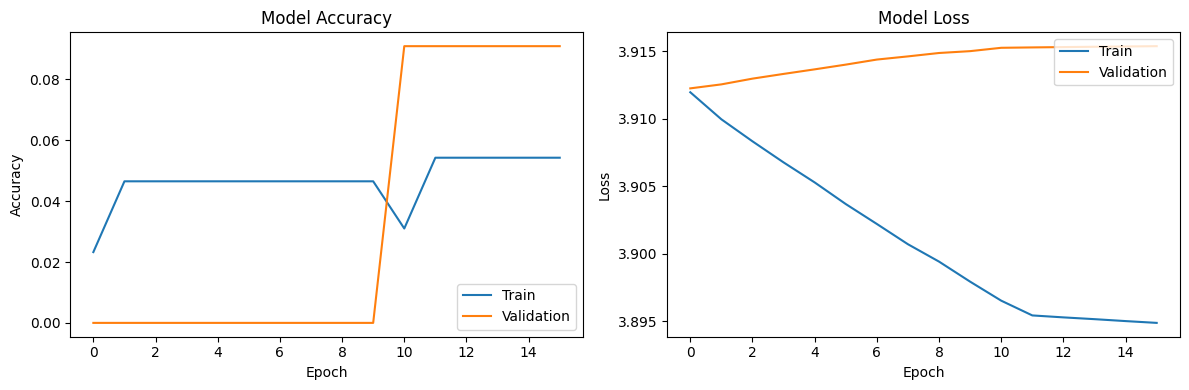

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


Classification Report:
                  precision    recall  f1-score   support

        10.อร่อย       0.00      0.00      0.00       2.0
          11.หิว       0.00      0.00      0.00       2.0
         12.อิ่ม       0.00      0.00      0.00       1.0
      15.ไม่สบาย       0.00      0.00      0.00       1.0
       16.สบายดี       0.00      0.00      0.00       3.0
          17.เธอ       0.00      0.00      0.00       1.0
          19.ฉัน       0.00      0.00      0.00       2.0
        2.ขอบคุณ       0.00      0.00      0.00       3.0
22.ตรงไปข้างหน้า       0.00      0.00      0.00       2.0
         25.ป่วย       0.00      0.00      0.00       1.0
    26.พบกันใหม่       0.00      0.00      0.00       1.0
         28.ง่วง       0.00      0.00      0.00       1.0
         29.อะไร       0.00      0.00      0.00       3.0
         3.ขอโทษ       0.00      0.00      0.00       2.0
       30.ที่ไหน       0.00      0.00      0.00       1.0
     32.โรงอาหาร       0.00      0.00      0.00

TypeError: expected str, bytes or os.PathLike object, not Sequential

In [36]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. โหลดข้อมูล
data_dir = '/content/drive/MyDrive/thai_sign_language_processed_data/'
X_train = np.load(f'{data_dir}X_train.npy')
X_val = np.load(f'{data_dir}X_val.npy')
X_test = np.load(f'{data_dir}X_test.npy')
y_train = np.load(f'{data_dir}y_train.npy')
y_val = np.load(f'{data_dir}y_val.npy')
y_test = np.load(f'{data_dir}y_test.npy')
classes = np.load(f'{data_dir}label_encoder_classes.npy')

# แปลง y เป็น one-hot encoding
num_classes = len(classes)
y_train_onehot = to_categorical(y_train, num_classes)
y_val_onehot = to_categorical(y_val, num_classes)
y_test_onehot = to_categorical(y_test, num_classes)

# แสดงข้อมูล
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train_onehot.shape}")
print(f"Number of classes: {num_classes}")
print(f"Classes: {classes}")

# 2. สร้างโมเดล LSTM
model = Sequential([
    # Input layer
    LSTM(128, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.4),

    # Second LSTM layer
    LSTM(64, return_sequences=False, activation='relu'),
    Dropout(0.4),

    # Dense layers
    Dense(64, activation='relu'),
    Dropout(0.4),

    # Output layer
    Dense(num_classes, activation='softmax')
])

# คอมไพล์โมเดล
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# สรุปโมเดล
model.summary()

# 3. กำหนด callbacks สำหรับการฝึกฝน
callbacks = [
    EarlyStopping(patience=15, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=10, min_lr=1e-6, verbose=1),
    ModelCheckpoint('thai_sign_language_model.h5', save_best_only=True, verbose=1)
]

# 4. ฝึกฝนโมเดล
history = model.fit(
    X_train, y_train_onehot,
    validation_data=(X_val, y_val_onehot),
    epochs=100,
    batch_size=32,
    callbacks=callbacks
)

# 5. ประเมินประสิทธิภาพของโมเดล
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)
print(f"Test accuracy: {test_accuracy:.4f}")

# 6. แสดงกราฟการฝึกฝน
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

# 7. ทำนายและวิเคราะห์ผล
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_onehot, axis=1)

# หาค่าคลาสที่มีในข้อมูลทดสอบ
unique_classes = np.unique(y_true_classes)
unique_classes_names = [classes[i] for i in unique_classes]

# สร้าง classification report ด้วยเฉพาะคลาสที่มีในข้อมูลทดสอบ
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, labels=unique_classes, target_names=unique_classes_names))

# สร้าง confusion matrix แบบย่อ
cm = confusion_matrix(y_true_classes, y_pred_classes)

# แสดงคู่คลาสที่มีการทำนายผิดมากที่สุด
print("\nTop misclassifications:")
error_pairs = []

# ใช้เฉพาะคลาสที่มีในข้อมูลทดสอบ
for i in range(len(unique_classes)):
    for j in range(len(unique_classes)):
        if i != j and cm[i, j] > 0:
            true_idx = unique_classes[i]
            pred_idx = unique_classes[j]
            error_pairs.append((true_idx, pred_idx, cm[i, j]))

# เรียงลำดับตามจำนวนการทำนายผิด
error_pairs.sort(key=lambda x: x[2], reverse=True)

# แสดง 10 คู่แรก (หรือน้อยกว่าถ้ามีไม่ถึง)
for true_idx, pred_idx, count in error_pairs[:min(10, len(error_pairs))]:
    true_label = classes[true_idx]
    pred_label = classes[pred_idx]
    print(f"คำจริง: {true_label}, คำที่ทำนายผิด: {pred_label}, จำนวน: {count}")

# แสดงคลาสที่ไม่มีในข้อมูลทดสอบ
missing_classes = set(range(num_classes)) - set(unique_classes)
if missing_classes:
    print(f"\nคำเตือน: {len(missing_classes)} คลาสไม่มีในข้อมูลทดสอบ:")
    for idx in missing_classes:
        print(f"  - {classes[idx]}")

# 8. บันทึกโมเดล
model.save('/content/drive/MyDrive/thai_sign_language_model_final.h5')
print("บันทึกโมเดลแล้วที่ '/content/drive/MyDrive/thai_sign_language_model_final.h5'")

# ทดสอบโมเดลกับวิดีโอที่บันทึกไว้แล้ว

In [41]:
import os
import cv2
import numpy as np
import tensorflow as tf
import mediapipe as mp
from matplotlib import pyplot as plt

def predict_from_video(model_path, video_path, classes_path):
    """
    ทำนายภาษามือจากวิดีโอ

    Args:
        model_path: พาธของโมเดล
        video_path: พาธของไฟล์วิดีโอ
        classes_path: พาธของไฟล์ classes
    """
    # โหลดโมเดล
    model = tf.keras.models.load_model(model_path)

    # โหลดคลาส
    classes = np.load(classes_path)

    # สกัดจุดสำคัญของมือจากวิดีโอ
    landmarks_sequence = extract_hand_landmarks_from_video(video_path)

    if landmarks_sequence is None:
        print("ไม่พบมือในวิดีโอ")
        return

    # ปรับรูปร่างข้อมูล
    X = landmarks_sequence.reshape(1, landmarks_sequence.shape[0], -1)

    # ทำนาย
    prediction = model.predict(X)[0]
    predicted_class = np.argmax(prediction)
    confidence = prediction[predicted_class]

    # แสดงผล
    print(f"คำที่ทำนาย: {classes[predicted_class]}")
    print(f"ความเชื่อมั่น: {confidence:.4f}")

    # แสดง top 5 การทำนาย
    top_indices = prediction.argsort()[-5:][::-1]
    print("\nTop 5 predictions:")
    for i in top_indices:
        print(f"{classes[i]}: {prediction[i]:.4f}")

def extract_hand_landmarks_from_video(video_path, max_frames=30):
    """
    สกัดจุดสำคัญของมือจากวิดีโอ
    """
    mp_hands = mp.solutions.hands
    cap = cv2.VideoCapture(video_path)

    # อ่านเฟรมทั้งหมด
    all_frames = []
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            break
        all_frames.append(image)

    cap.release()

    if not all_frames:
        return None

    # เลือกเฟรมกระจาย
    if len(all_frames) > max_frames:
        indices = np.linspace(0, len(all_frames) - 1, max_frames, dtype=int)
        frames = [all_frames[i] for i in indices]
    else:
        frames = all_frames
        while len(frames) < max_frames:
            frames.append(frames[-1])  # ทำซ้ำเฟรมสุดท้าย

    # ประมวลผลเฟรม
    landmarks_sequence = []

    with mp_hands.Hands(
        static_image_mode=False,
        max_num_hands=2,
        min_detection_confidence=0.3) as hands:

        for frame in frames:
            # แปลงภาพเป็น RGB
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # ประมวลผลภาพ
            results = hands.process(frame_rgb)

            # จัดเรียงมือซ้าย-ขวา
            left_hand = right_hand = None

            if results.multi_hand_landmarks:
                for idx, handedness in enumerate(results.multi_handedness):
                    if handedness.classification[0].label == "Left":
                        left_hand = results.multi_hand_landmarks[idx]
                    else:
                        right_hand = results.multi_hand_landmarks[idx]

            # สกัดจุดสำคัญจากมือซ้าย (ถ้ามี)
            left_landmarks = []
            if left_hand:
                for landmark in left_hand.landmark:
                    left_landmarks.extend([landmark.x, landmark.y, landmark.z])
            else:
                left_landmarks = [0.0] * 21 * 3

            # สกัดจุดสำคัญจากมือขวา (ถ้ามี)
            right_landmarks = []
            if right_hand:
                for landmark in right_hand.landmark:
                    right_landmarks.extend([landmark.x, landmark.y, landmark.z])
            else:
                right_landmarks = [0.0] * 21 * 3

            # รวมจุดของทั้งสองมือ
            frame_landmarks = left_landmarks + right_landmarks
            landmarks_sequence.append(frame_landmarks)

    # ตรวจสอบว่าพบมือในวิดีโออย่างน้อยหนึ่งเฟรม
    if not any(sum(frame) > 0 for frame in landmarks_sequence):
        return None

    return np.array(landmarks_sequence)

# ตัวอย่างการใช้งาน
model_path = '/content/drive/MyDrive/thai_sign_language_model_final.h5'
classes_path = '/content/drive/MyDrive/thai_sign_language_processed_data/label_encoder_classes.npy'
video_path = '/content/drive/MyDrive/sign/16.สบายดี/สบายดี 2.MOV'  # เปลี่ยนเป็นพาธของวิดีโอที่ต้องการทดสอบ

predict_from_video(model_path, video_path, classes_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
คำที่ทำนาย: 22.ตรงไปข้างหน้า
ความเชื่อมั่น: 0.0222

Top 5 predictions:
22.ตรงไปข้างหน้า: 0.0222
10.อร่อย: 0.0216
47.วันนี้: 0.0214
5.สวย: 0.0213
16.สบายดี: 0.0212


ทดสอบโมเดลกับกล้องเรียลไทม์

In [38]:
import cv2
import numpy as np
import tensorflow as tf
import mediapipe as mp
from collections import deque

def realtime_sign_recognition(model_path, classes_path):
    """
    รู้จำภาษามือแบบเรียลไทม์จากกล้อง

    Args:
        model_path: พาธของโมเดล
        classes_path: พาธของไฟล์ classes
    """
    # โหลดโมเดล
    model = tf.keras.models.load_model(model_path)

    # โหลดคลาส
    classes = np.load(classes_path)

    # ตั้งค่า MediaPipe
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils

    # เปิดกล้อง
    cap = cv2.VideoCapture(0)

    # ตั้งค่า MediaPipe Hands
    with mp_hands.Hands(
        static_image_mode=False,
        max_num_hands=2,
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as hands:

        # สำหรับเก็บลำดับการทำนาย
        predictions_queue = deque(maxlen=10)
        landmarks_sequence = deque(maxlen=30)

        while cap.isOpened():
            success, image = cap.read()
            if not success:
                print("ไม่สามารถเปิดกล้องได้")
                break

            # เตรียมภาพสำหรับ MediaPipe
            image = cv2.flip(image, 1)  # flip to mirror
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            results = hands.process(image_rgb)

            # จัดเตรียมข้อมูลจุดสำคัญ
            left_hand = right_hand = None

            if results.multi_hand_landmarks:
                # วาดจุดสำคัญบนภาพ
                for idx, hand_landmark in enumerate(results.multi_hand_landmarks):
                    mp_drawing.draw_landmarks(
                        image,
                        hand_landmark,
                        mp_hands.HAND_CONNECTIONS)

                    # จัดเรียงมือซ้าย-ขวา
                    if results.multi_handedness[idx].classification[0].label == "Left":
                        left_hand = hand_landmark
                    else:
                        right_hand = hand_landmark

            # สกัดจุดสำคัญจากมือซ้าย (ถ้ามี)
            left_landmarks = []
            if left_hand:
                for landmark in left_hand.landmark:
                    left_landmarks.extend([landmark.x, landmark.y, landmark.z])
            else:
                left_landmarks = [0.0] * 21 * 3

            # สกัดจุดสำคัญจากมือขวา (ถ้ามี)
            right_landmarks = []
            if right_hand:
                for landmark in right_hand.landmark:
                    right_landmarks.extend([landmark.x, landmark.y, landmark.z])
            else:
                right_landmarks = [0.0] * 21 * 3

            # รวมจุดของทั้งสองมือ
            frame_landmarks = left_landmarks + right_landmarks

            # เพิ่มเฟรมปัจจุบันเข้าไปในลำดับ
            landmarks_sequence.append(frame_landmarks)

            # ทำนายเมื่อมีข้อมูลเพียงพอ
            if len(landmarks_sequence) == 30:
                # เตรียมข้อมูลสำหรับโมเดล
                X = np.array(list(landmarks_sequence)).reshape(1, 30, -1)

                # ทำนาย
                prediction = model.predict(X, verbose=0)[0]
                predicted_class = np.argmax(prediction)
                confidence = prediction[predicted_class]

                if confidence > 0.5:  # แสดงผลเฉพาะเมื่อความเชื่อมั่นมากกว่า 0.5
                    predictions_queue.append(predicted_class)

                    # นับความถี่ของการทำนาย
                    from collections import Counter
                    most_common = Counter(predictions_queue).most_common(3)

                    # แสดงผลการทำนาย 3 อันดับแรก
                    y_pos = 30
                    for i, (class_idx, count) in enumerate(most_common):
                        if i >= 3:  # แสดงแค่ 3 อันดับแรก
                            break
                        confidence_ratio = count / len(predictions_queue)
                        if confidence_ratio >= 0.3:  # แสดงเฉพาะคำที่มีความเชื่อมั่นมากกว่า 30%
                            text = f"{classes[class_idx]} ({confidence_ratio:.2f})"
                            color = (0, 255, 0) if i == 0 else (0, 200, 200)
                            cv2.putText(image, text, (10, y_pos), cv2.FONT_HERSHEY_SIMPLEX,
                                      1, color, 2, cv2.LINE_AA)
                            y_pos += 40

            # แสดงคำแนะนำ
            cv2.putText(image, "Press 'q' to quit",
                      (10, image.shape[0] - 30), cv2.FONT_HERSHEY_SIMPLEX,
                      0.7, (0, 0, 255), 2)

            # แสดงภาพ
            cv2.imshow('Thai Sign Language Recognition', image)

            # กด q เพื่อออก
            if cv2.waitKey(5) & 0xFF == ord('q'):
                break

        # คืนทรัพยากร
        cap.release()
        cv2.destroyAllWindows()

# เรียกใช้ฟังก์ชันรู้จำภาษามือแบบเรียลไทม์
model_path = '/content/drive/MyDrive/thai_sign_language_model_final.h5'
classes_path = '/content/drive/MyDrive/thai_sign_language_processed_data/label_encoder_classes.npy'

realtime_sign_recognition(model_path, classes_path)

เรียกใช้ฟังก์ชันสำหรับการรู้จำภาษามือแบบเรียลไทม์

In [39]:
# โหลดโมเดล
model = tf.keras.models.load_model('/content/drive/MyDrive/thai_sign_language_model_final.h5')

# โหลดคลาส
classes = np.load('/content/drive/MyDrive/thai_sign_language_processed_data/label_encoder_classes.npy')

# รู้จำภาษามือแบบเรียลไทม์
realtime_sign_recognition(model, classes)

# Data Augmentation

เพิ่มความหลากหลายของข้อมูล สร้างข้อมูลเทียม เพิ่มความทนทานของโมเดล

In [ ]:
import random

class SignLanguageDataAugmentation:
    def __init__(self, original_data):
        """
        เตรียมการเพิ่มความหลากหลายของข้อมูลภาษามือ

        Args:
            original_data: ข้อมูลแลนด์มาร์คเดิม
        """
        self.original_data = original_data

    def add_noise(self, data, noise_level=0.02):
        """
        เพิ่มความคลาดเคลื่อนเล็กน้อยในข้อมูล

        Args:
            data: ข้อมูลแลนด์มาร์ค
            noise_level: ระดับความคลาดเคลื่อน

        Returns:
            ข้อมูลที่เพิ่มความคลาดเคลื่อน
        """
        noise = np.random.normal(
            loc=0,
            scale=noise_level,
            size=data.shape
        )
        return data + noise

    def time_warping(self, data, max_warp=5):
        """
        ยืดหรือบีบเวลาของลำดับการเคลื่อนไหว

        Args:
            data: ข้อมูลแลนด์มาร์ค
            max_warp: จำนวนเฟรมสูงสุดที่จะยืดหรือบีบ

        Returns:
            ข้อมูลที่ถูกดัดแปลงเวลา
        """
        # สุ่มเลือกจุดที่จะยืดหรือบีบ
        warp_point = random.randint(0, len(data) - max_warp - 1)

        # สร้างข้อมูลใหม่
        warped_data = np.copy(data)

        # ซ้ำหรือลบเฟรมบางส่วน
        insert_point = random.randint(0, max_warp)
        warped_data = np.insert(
            warped_data,
            warp_point + insert_point,
            warped_data[warp_point:warp_point+max_warp],
            axis=0
        )

        # ตัดให้มีความยาวคงเดิม
        return warped_data[:len(data)]

    def hand_rotation(self, data):
        """
        หมุนตำแหน่งมือ

        Args:
            data: ข้อมูลแลนด์มาร์ค

        Returns:
            ข้อมูลที่ถูกหมุน
        """
        # สุ่มมุมหมุน
        angle = np.random.uniform(-30, 30)

        # แปลงเป็นเรเดียน
        angle_rad = np.deg2rad(angle)

        # เมทริกซ์หมุน
        rotation_matrix = np.array([
            [np.cos(angle_rad), -np.sin(angle_rad)],
            [np.sin(angle_rad), np.cos(angle_rad)]
        ])

        # คัดลอกข้อมูล
        rotated_data = np.copy(data)

        # หมุนพิกัด x, y
        for i in range(len(rotated_data)):
            for j in range(0, len(rotated_data[i]), 3):
                rotated_data[i][j:j+2] = np.dot(
                    rotation_matrix,
                    rotated_data[i][j:j+2]
                )

        return rotated_data

    def generate_augmented_data(self, num_augmentations=5):
        """
        สร้างชุดข้อมูลเพิ่มเติม

        Args:
            num_augmentations: จำนวนข้อมูลที่ต้องการสร้าง

        Returns:
            ชุดข้อมูลที่ถูกเพิ่มความหลากหลาย
        """
        augmented_data = []

        for _ in range(num_augmentations):
            # สุ่มเลือกข้อมูลต้นฉบับ
            base_data = random.choice(self.original_data)

            # เพิ่มความหลากหลาย
            augmented_sample = self.add_noise(base_data)
            augmented_sample = self.time_warping(augmented_sample)
            augmented_sample = self.hand_rotation(augmented_sample)

            augmented_data.append(augmented_sample)

        return augmented_data

# ตัวอย่างการใช้งาน
# สมมติ X คือชุดข้อมูลเดิม
augmentor = SignLanguageDataAugmentation(X)
augmented_X = augmentor.generate_augmented_data()

# รวมข้อมูล
X_augmented = np.concatenate([X, augmented_X])
y_augmented = np.concatenate([y, y[:len(augmented_X)]])

# Feature Engineering

สกัดคุณลักษณะพิเศษ
คำนวณความเร็ว ความเร่ง
วิเคราะห์คุณสมบัติทางสถิติ



In [ ]:
from scipy.stats import skew, kurtosis

class SignLanguageFeatureExtractor:
    def __init__(self, landmarks_data):
        """
        สกัดคุณลักษณะพิเศษจากข้อมูลแลนด์มาร์ค

        Args:
            landmarks_data: ข้อมูลแลนด์มาร์คภาษามือ
        """
        self.landmarks_data = landmarks_data

    def calculate_hand_velocity(self):
        """
        คำนวณความเร็วของการเคลื่อนไหวมือ

        Returns:
            อาร์เรย์ของความเร็วมือในแต่ละเฟรม
        """
        velocities = []
        for sequence in self.landmarks_data:
            frame_velocities = []
            for frame_idx in range(1, len(sequence)):
                # คำนวณการเปลี่ยนแปลงตำแหน่ง
                prev_frame = sequence[frame_idx-1]
                curr_frame = sequence[frame_idx]

                # คำนวณความเร็ว
                frame_velocity = np.linalg.norm(
                    curr_frame[:21*3] - prev_frame[:21*3]
                )
                frame_velocities.append(frame_velocity)

            velocities.append(frame_velocities)

        return np.array(velocities)

    def calculate_hand_acceleration(self):
        """
        คำนวณความเร่งของการเคลื่อนไหวมือ

        Returns:
            อาร์เรย์ของความเร่งมือในแต่ละเฟรม
        """
        accelerations = []
        velocities = self.calculate_hand_velocity()

        for velocity_sequence in velocities:
            frame_accelerations = []
            for frame_idx in range(1, len(velocity_sequence)):
                # คำนวณการเปลี่ยนแปลงความเร็ว
                acceleration = abs(
                    velocity_sequence[frame_idx] -
                    velocity_sequence[frame_idx-1]
                )
                frame_accelerations.append(acceleration)

            accelerations.append(frame_accelerations)

        return np.array(accelerations)

    def calculate_statistical_features(self):
        """
        คำนวณคุณลักษณะทางสถิติ

        Returns:
            พจนานุกรมของคุณลักษณะทางสถิติ
        """
        features = []

        for sequence in self.landmarks_data:
            sequence_features = {}

            # คำนวณคุณลักษณะสำหรับแต่ละมือ
            for hand_start in [0, 21*3]:
                hand_landmarks = sequence[:, hand_start:hand_start+21*3]

                # สถิติพื้นฐาน
                sequence_features.update({
                    f'hand_{hand_start//63}_mean': np.mean(hand_landmarks),
                    f'hand_{hand_start//63}_std': np.std(hand_landmarks),
                    f'hand_{hand_start//63}_skewness': skew(hand_landmarks.flatten()),
                    f'hand_{hand_start//63}_kurtosis': kurtosis(hand_landmarks.flatten())
                })

            features.append(sequence_features)

        return features

    def extract_advanced_features(self):

      # รวบรวมคุณลักษณะต่างๆ
      velocities = self.calculate_hand_velocity()
      accelerations = self.calculate_hand_acceleration()
      statistical_features = self.calculate_statistical_features()

      # แปลงเป็นรูปแบบที่เหมาะสมสำหรับโมเดล
      feature_matrix = []
      for i in range(len(self.landmarks_data)):
          # แปลงค่าเดี่ยวให้เป็น array ด้วย np.array() หรือใช้ list
          velocity_mean = np.mean(velocities[i])  # ค่าเดี่ยว
          acceleration_mean = np.mean(accelerations[i])  # ค่าเดี่ยว
          stat_features = list(statistical_features[i].values())  # list ของค่า

          # รวมคุณลักษณะโดยสร้างเป็น list ก่อน แล้วค่อยแปลงเป็น numpy array
          features = np.array([velocity_mean, acceleration_mean] + stat_features)
          feature_matrix.append(features)

      return np.array(feature_matrix)

# ตัวอย่างการใช้งาน
feature_extractor = SignLanguageFeatureExtractor(X)
X_advanced_features = feature_extractor.extract_advanced_features()

# Model Selection & Hyperparameter Tuning

ทดสอบหลายสถาปัตยกรรม
LSTM, CNN, Transformer
เปรียบเทียบประสิทธิภาพ และ ค้นหาพารามิเตอร์ที่เหมาะสม
ใช้ Random Search
ปรับแต่งโมเดลให้ดีขึ้น

In [ ]:
!pip install scikeras

In [ ]:
import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
from scipy.stats import uniform, randint

class SignLanguageModelSelector:
    def __init__(self, X_train, y_train, X_test, y_test):
        """
        เลือกและปรับแต่งโมเดลสำหรับภาษามือ

        Args:
            X_train: ข้อมูลฝึกอบรม
            y_train: ป้ายกำกับการฝึกอบรม
            X_test: ข้อมูลทดสอบ
            y_test: ป้ายกำกับการทดสอบ
        """
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

        # โมเดลที่จะทดสอบ
        self.models = {
            'LSTM': self.create_lstm_model,
            'CNN': self.create_cnn_model,
            'Transformer': self.create_transformer_model
        }

    def create_lstm_model(self, units=64, dropout=0.3):
      """
      สร้างโมเดล LSTM

      Args:
          units: จำนวนหน่วยใน LSTM layer
          dropout: อัตราการ dropout

      Returns:
          โมเดล Keras
      """
      # รับข้อมูลรูปร่าง (30, 42, 3) - ปรับตามรูปร่างจริงของข้อมูล
      model = tf.keras.Sequential([
          # เพิ่ม Reshape layer เพื่อแบนมิติสุดท้าย
          tf.keras.layers.Reshape((30, 42*3), input_shape=(30, 42, 3)),

          tf.keras.layers.LSTM(
              units,
              return_sequences=True
          ),
          tf.keras.layers.Dropout(dropout),
          tf.keras.layers.LSTM(units//2),
          tf.keras.layers.Dense(
              len(np.unique(self.y_train)),
              activation='softmax'
          )
      ])

      model.compile(
          optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy']
      )

      return model

    def create_cnn_model(self, filters=64, kernel_size=3):
      """
      สร้างโมเดล CNN

      Args:
          filters: จำนวน filters
          kernel_size: ขนาด kernel

      Returns:
          โมเดล Keras
      """
      model = tf.keras.Sequential([
          # ใช้ Conv2D แทน Conv1D
          tf.keras.layers.Conv2D(
              filters,
              kernel_size=(kernel_size, kernel_size),  # kernel size ต้องเป็น tuple สำหรับ Conv2D
              input_shape=(30, 42, 3),
              activation='relu'
          ),
          tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(
              len(np.unique(self.y_train)),
              activation='softmax'
          )
      ])

      model.compile(
          optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy']
      )

      return model

    def create_transformer_model(self, num_heads=4, ff_dim=32):
        """
        สร้างโมเดล Transformer

        Args:
            num_heads: จำนวน attention heads
            ff_dim: ขนาดของ feed-forward layer

        Returns:
            โมเดล Keras
        """
        # ปรับรูปร่างของ input
        inputs = tf.keras.Input(shape=(30, 42, 3))  # ปรับตามรูปร่างจริงของข้อมูล

        # แบนมิติสุดท้าย
        x = tf.keras.layers.Reshape((30, 42*3))(inputs)

        # Transformer Encoder
        for _ in range(2):
            x = tf.keras.layers.MultiHeadAttention(
                num_heads=num_heads,
                key_dim=ff_dim
            )(x, x)
            x = tf.keras.layers.LayerNormalization()(x)

        x = tf.keras.layers.GlobalAveragePooling1D()(x)
        x = tf.keras.layers.Dense(ff_dim, activation='relu')(x)
        outputs = tf.keras.layers.Dense(
            len(np.unique(self.y_train)),
            activation='softmax'
        )(x)

        model = tf.keras.Model(inputs=inputs, outputs=outputs)
        model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

    def hyperparameter_tuning(self):
      # เตรียม Keras Classifier
      model = KerasClassifier(
          model=self.create_lstm_model,  # เปลี่ยนจาก build_fn เป็น model
          verbose=0
      )

      # ปรับช่วงพารามิเตอร์
      param_dist = {
          'model__units': [32, 64, 128],  # เพิ่ม model__ ข้างหน้า
          'model__dropout': uniform(0.2, 0.5),
          'batch_size': [16, 32, 64],
          'epochs': [50, 100, 200]
      }

      # ตรวจสอบจำนวนข้อมูล
      if len(self.X_train) < 10:  # ถ้าข้อมูลน้อยเกินไป
          print("ข้อมูลมีจำนวนน้อยเกินไปสำหรับ hyperparameter tuning")
          return model  # คืนค่าโมเดลเริ่มต้น

      # กำหนด cv ตามขนาดข้อมูล
      cv_value = min(3, len(self.X_train) // 2)

      # Random Search
      random_search = RandomizedSearchCV(
          estimator=model,
          param_distributions=param_dist,
          n_iter=10,
          cv=cv_value,
          scoring='accuracy'
      )

      # ตรวจสอบว่ามีพื้นที่พอสำหรับ validation_split หรือไม่
      if len(self.X_train) > 5:  # ถ้ามีข้อมูลมากกว่า 5 ตัวอย่าง
          random_search.fit(
              self.X_train,
              self.y_train,
              validation_split=0.2
          )
      else:
          random_search.fit(
              self.X_train,
              self.y_train
          )

      return random_search.best_estimator_

    def compare_models(self):
      results = {}

      #ตรวจสอบจำนวนข้อมูลฝึกอบรม
      if len(self.X_train) < 10:  # หากข้อมูลน้อยกว่า 10 ตัวอย่าง
          validation_split = None
          validation_data = None
      else:
          validation_split = 0.2
          validation_data = None

      for name, model_creator in self.models.items():
          # สร้างโมเดล
          model = model_creator()

          #ฝึกอบรม - ปรับการใช้ validation
          if validation_split:
              history = model.fit(
                  self.X_train, self.y_train,
                  validation_split=validation_split,
                  epochs=50,
                  batch_size=min(32, len(self.X_train))  # ปรับขนาด batch ตามข้อมูล
              )
          else:
              history = model.fit(
                  self.X_train, self.y_train,
                  epochs=50,
                  batch_size=min(32, len(self.X_train))
              )

          #ประเมินผล
          test_loss, test_accuracy = model.evaluate(
              self.X_test, self.y_test
          )

          results[name] = {
              'test_accuracy': test_accuracy,
              'test_loss': test_loss,
              'training_history': history
          }

      return results

# ตัวอย่างการใช้งาน
model_selector = SignLanguageModelSelector(
    X_train, y_train, X_test, y_test
)

# เปรียบเทียบโมเดล
model_comparison = model_selector.compare_models()

# ปรับแต่งพารามิเตอร์
best_model = model_selector.hyperparameter_tuning()



*   เทรนโมเดลที่ดีที่สุดให้ละเอียดยิ่งขึ้นด้วยการเทรนหลายรอบ
*   เพิ่มประสิทธิภาพด้วยการเพิ่มข้อมูล (Data Augmentation)
*  ประเมินและวิเคราะห์ผลลัพธ์อย่างละเอียด
*   เตรียมโมเดลสำหรับการนำไปใช้งาน





In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import pandas as pd

class SignLanguageModelTrainer:
  def __init__(self, model_selector, best_model=None, best_model_name=None):
        """
        ฝึกอบรมและปรับปรุงโมเดลภาษามือที่ดีที่สุด

        Args:
            model_selector: อ็อบเจ็กต์ SignLanguageModelSelector ที่ใช้ก่อนหน้านี้
            best_model: โมเดลที่ดีที่สุดจากการปรับแต่งพารามิเตอร์ (หากมี)
            best_model_name: ชื่อสถาปัตยกรรมที่ดีที่สุด (LSTM, CNN, Transformer)
        """
        self.model_selector = model_selector
        self.X_train = model_selector.X_train
        self.y_train = model_selector.y_train
        self.X_test = model_selector.X_test
        self.y_test = model_selector.y_test
        self.best_model = best_model
        self.best_model_name = best_model_name
        self.num_classes = len(np.unique(self.y_train))

  def prepare_best_model(self, model_comparison=None):
        """
        เตรียมโมเดลที่ดีที่สุดสำหรับการเทรนอย่างละเอียด

        Args:
            model_comparison: ผลลัพธ์จาก model_selector.compare_models()

        Returns:
            โมเดลที่ดีที่สุดพร้อมค่าพารามิเตอร์เริ่มต้น
        """
        if self.best_model is not None:
            print(f"ใช้โมเดลที่กำหนดไว้: {self.best_model_name}")
            return self.best_model

        if model_comparison is not None:
            # หาโมเดลที่ดีที่สุดจากความแม่นยำ
            best_acc = 0
            for name, results in model_comparison.items():
                if results['test_accuracy'] > best_acc:
                    best_acc = results['test_accuracy']
                    self.best_model_name = name

            print(f"โมเดลที่ดีที่สุดจากการเปรียบเทียบ: {self.best_model_name} (ความแม่นยำ: {best_acc:.4f})")

#สร้างโมเดลใหม่ตามสถาปัตยกรรมที่ดีที่สุด
            if self.best_model_name == 'LSTM':
                self.best_model = self.model_selector.create_lstm_model()
            elif self.best_model_name == 'CNN':
                self.best_model = self.model_selector.create_cnn_model()
            elif self.best_model_name == 'Transformer':
                self.best_model = self.model_selector.create_transformer_model()
            else:
                raise ValueError("ไม่พบชื่อโมเดลที่ถูกต้อง")

            return self.best_model

#ถ้าไม่มีข้อมูลเปรียบเทียบโมเดล ให้ใช้ LSTM เป็นค่าเริ่มต้น
        print("ไม่มีการเปรียบเทียบโมเดล ใช้ LSTM เป็นค่าเริ่มต้น")
        self.best_model_name = 'LSTM'
        self.best_model = self.model_selector.create_lstm_model()
        return self.best_model

  def create_data_augmentation(self):
    """
    สร้างฟังก์ชันสำหรับเพิ่มข้อมูล

    Returns:
        ฟังก์ชันสำหรับเพิ่มข้อมูล
    """
    def augment_sequence(sequence, label):
        # แปลงเป็น tensor โดยไม่ระบุ dtype เพื่อให้ใช้ชนิดเดิมของข้อมูล
        # หรือแปลงข้อมูลเป็น float32 ก่อนเรียกฟังก์ชันนี้
        sequence = tf.cast(sequence, tf.float32)  # แก้ไขตรงนี้

        # เพิ่มสัญญาณรบกวน (Gaussian noise)
        if tf.random.uniform([]) < 0.5:
            noise = tf.random.normal(shape=tf.shape(sequence), mean=0.0, stddev=0.05)
            sequence = sequence + noise

        # สลับเวลา (Time shifting)
        if tf.random.uniform([]) < 0.5:
            shift = tf.random.uniform([], minval=-3, maxval=3, dtype=tf.int32)
            sequence = tf.roll(sequence, shift, axis=0)

        # สเกลแอมพลิจูด (Amplitude scaling)
        if tf.random.uniform([]) < 0.5:
            scale = tf.random.uniform([], minval=0.8, maxval=1.2)
            sequence = sequence * scale

        # หมุนและเอียง (ทำกับข้อมูลที่เป็นตำแหน่ง x, y, z)
        # สมมติว่าข้อมูลมี dimension เป็น [timesteps, features, channels]
        # ให้ปรับการหมุนให้เข้ากับรูปร่างข้อมูลที่มี 3 มิติ

        return sequence, label

    return augment_sequence

  def create_train_dataset(self, batch_size=32, use_augmentation=True):
        """
        สร้าง dataset สำหรับการเทรน

        Args:
            batch_size: ขนาด batch
            use_augmentation: ใช้การเพิ่มข้อมูลหรือไม่

        Returns:
            tf.data.Dataset สำหรับการเทรน
        """
        train_dataset = tf.data.Dataset.from_tensor_slices((self.X_train, self.y_train))

        if use_augmentation:
            augment_func = self.create_data_augmentation()
            train_dataset = train_dataset.map(augment_func, num_parallel_calls=tf.data.AUTOTUNE)

        train_dataset = train_dataset.shuffle(buffer_size=len(self.X_train))
        train_dataset = train_dataset.batch(batch_size)
        train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

        return train_dataset

  def create_validation_dataset(self, batch_size=32):
        # ตรวจสอบว่ามีข้อมูลเพียงพอสำหรับการแบ่ง
      if len(self.X_train) < 10:  # ถ้าข้อมูลน้อยเกินไป
          # ใช้ข้อมูลเดียวกันกับชุดข้อมูลทดสอบ
          X_val = self.X_test
          y_val = self.y_test
      else:
          # แยก validation set จาก training set
          val_split = int(len(self.X_train) * 0.9)
          X_val = self.X_train[val_split:]
          y_val = self.y_train[val_split:]

      val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
      val_dataset = val_dataset.batch(batch_size)
      val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)

      return val_dataset

  def train_with_progressive_learning(self, epochs=300, batch_size=32, patience=20):
        """
        ฝึกอบรมโมเดลด้วยการเรียนรู้แบบก้าวหน้า

        Args:
            epochs: จำนวนรอบการเทรนทั้งหมด
            batch_size: ขนาด batch
            patience: จำนวนรอบที่รอก่อนที่จะหยุดเมื่อไม่มีการปรับปรุง

        Returns:
            ประวัติการเทรน
        """
        # เตรียมโมเดล
        model = self.prepare_best_model()

        # Callbacks
        callbacks = [
            # บันทึกโมเดลที่ดีที่สุด
            ModelCheckpoint(
                f'best_{self.best_model_name}_model.h5',
                monitor='val_accuracy',
                save_best_only=True,
                mode='max',
                verbose=1
            ),
            # ลด learning rate เมื่อไม่มีการปรับปรุง
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=10,
                min_lr=1e-6,
                verbose=1
            ),
            # หยุดเมื่อไม่มีการปรับปรุง
            EarlyStopping(
                monitor='val_loss',
                patience=patience,
                restore_best_weights=True,
                verbose=1
            )
        ]

        # สร้าง datasets
        train_dataset = self.create_train_dataset(batch_size=batch_size)
        val_dataset = self.create_validation_dataset(batch_size=batch_size)

        # ฝึกอบรมโมเดล
        history = model.fit(
            train_dataset,
            epochs=epochs,
            validation_data=val_dataset,
            callbacks=callbacks,
            verbose=1
        )

        # บันทึกโมเดลสุดท้าย
        model.save(f'final_{self.best_model_name}_model.h5')

        self.best_model = model  # อัปเดตโมเดลที่ดีที่สุด

        return history

  def evaluate_model(self):
        """
        ประเมินโมเดลบนชุดข้อมูลทดสอบ

        Returns:
            ผลการประเมิน
        """
        if self.best_model is None:
            raise ValueError("โมเดลยังไม่ได้รับการฝึกอบรม")

        # ประเมินบนชุดข้อมูลทดสอบ
        test_loss, test_acc = self.best_model.evaluate(self.X_test, self.y_test)
        print(f"ความแม่นยำบนชุดข้อมูลทดสอบ: {test_acc:.4f}")

        # ทำนายคลาส
        y_pred = np.argmax(self.best_model.predict(self.X_test), axis=1)

        # สร้าง confusion matrix
        cm = confusion_matrix(self.y_test, y_pred)

        # สร้างรายงานการจำแนก
        report = classification_report(self.y_test, y_pred, output_dict=True)

        return {
            'test_accuracy': test_acc,
            'test_loss': test_loss,
            'confusion_matrix': cm,
            'classification_report': report
        }

  def plot_training_history(self, history):
        """
        วาดกราฟประวัติการเทรน

        Args:
            history: ประวัติการเทรนจาก model.fit()
        """
        # สร้างกราฟ
        plt.figure(figsize=(12, 5))

        # กราฟค่า accuracy
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='train')
        plt.plot(history.history['val_accuracy'], label='validation')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        # กราฟค่า loss
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='validation')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.savefig(f'{self.best_model_name}_training_history.png')
        plt.show()

  def plot_confusion_matrix(self, cm, class_names=None):
        """
        วาดกราฟ confusion matrix

        Args:
            cm: confusion matrix
            class_names: ชื่อคลาส (หากมี)
        """
        if class_names is None:
            class_names = [str(i) for i in range(self.num_classes)]

        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=class_names,
                   yticklabels=class_names)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.tight_layout()
        plt.savefig(f'{self.best_model_name}_confusion_matrix.png')
        plt.show()

  def analyze_errors(self, top_n=5):
        """
        วิเคราะห์ข้อผิดพลาดที่พบบ่อย

        Args:
            top_n: จำนวนคู่ของความผิดพลาดที่พบบ่อยที่สุดที่จะแสดง
        """
        # ทำนายบนชุดข้อมูลทดสอบ
        y_pred = np.argmax(self.best_model.predict(self.X_test), axis=1)

        # หาตัวอย่างที่ทำนายผิด
        misclassified_indices = np.where(y_pred != self.y_test)[0]

        if len(misclassified_indices) == 0:
            print("ไม่พบข้อผิดพลาดในการทำนาย!")
            return

        # สร้างตารางคู่ของ (ป้ายกำกับจริง, ป้ายกำกับที่ทำนาย)
        error_pairs = [(self.y_test[i], y_pred[i]) for i in misclassified_indices]

        # นับความถี่ของแต่ละคู่
        error_counts = {}
        for true_label, pred_label in error_pairs:
            key = (true_label, pred_label)
            if key in error_counts:
                error_counts[key] += 1
            else:
                error_counts[key] = 1

        # เรียงลำดับตามความถี่
        sorted_errors = sorted(error_counts.items(), key=lambda x: x[1], reverse=True)

        # แสดงคู่ที่พบบ่อยที่สุด
        print(f"คู่ของข้อผิดพลาดที่พบบ่อยที่สุด {min(top_n, len(sorted_errors))} คู่:")
        for (true_label, pred_label), count in sorted_errors[:top_n]:
            print(f"  ป้ายกำกับจริง: {true_label}, ทำนายเป็น: {pred_label}, จำนวน: {count} ครั้ง")

  def export_model_for_deployment(self, model_format='tflite'):
      """
      ส่งออกโมเดลสำหรับการนำไปใช้งาน

      Args:
          model_format: รูปแบบของโมเดลที่จะส่งออก ('tflite' หรือ 'saved_model')

      Returns:
          พาธไปยังโมเดลที่ส่งออก
      """
      if self.best_model is None:
          raise ValueError("โมเดลยังไม่ได้รับการฝึกอบรม")

      if model_format == 'tflite':
          try:
              # แปลงเป็น TFLite
              converter = tf.lite.TFLiteConverter.from_keras_model(self.best_model)

              # ตั้งค่าพิเศษเพื่อเพิ่มความเข้ากันได้
              converter.target_spec.supported_ops = [
                  tf.lite.OpsSet.TFLITE_BUILTINS,  # ใช้ operator ที่มีมาตรฐานใน TFLite
                  tf.lite.OpsSet.SELECT_TF_OPS     # ใช้ operator ของ TensorFlow ถ้าจำเป็น
              ]

              # ตั้งค่าเพิ่มเติมเพื่อให้ conversion สำเร็จ
              converter.allow_custom_ops = True
              converter.experimental_new_converter = True

              # ลองลดขนาดโมเดล
              converter.optimizations = [tf.lite.Optimize.DEFAULT]

              # แปลงโมเดล
              print("กำลังแปลงโมเดลเป็น TFLite...")
              tflite_model = converter.convert()

              # บันทึกไฟล์
              model_path = f'{self.best_model_name}_model.tflite'
              with open(model_path, 'wb') as f:
                  f.write(tflite_model)

              print(f"ส่งออกโมเดล TFLite แล้วที่: {model_path}")
              return model_path

          except Exception as e:
              print(f"เกิดข้อผิดพลาดในการแปลงเป็น TFLite: {e}")
              print("ลองส่งออกในรูปแบบ SavedModel แทน...")
              # ส่งออกในรูปแบบ SavedModel เป็นตัวเลือกสำรอง
              return self.export_model_for_deployment(model_format='saved_model')

      elif model_format == 'saved_model':
          try:
              # บันทึกในรูปแบบ SavedModel
              model_path = f'{self.best_model_name}_saved_model'
              tf.saved_model.save(self.best_model, model_path)

              print(f"ส่งออกโมเดล SavedModel แล้วที่: {model_path}")
              return model_path
          except Exception as e:
              print(f"เกิดข้อผิดพลาดในการส่งออกเป็น SavedModel: {e}")
              print("ลองส่งออกในรูปแบบ h5 แทน...")

              # ส่งออกในรูปแบบ h5 เป็นตัวเลือกสำรอง
              model_path = f'{self.best_model_name}_model.h5'
              self.best_model.save(model_path)
              print(f"ส่งออกโมเดลในรูปแบบ h5 แล้วที่: {model_path}")
              return model_path

      else:
          raise ValueError("รูปแบบโมเดลไม่ถูกต้อง ต้องเป็น 'tflite' หรือ 'saved_model'")
# ตัวอย่างการใช้งาน
def main():
    # สมมติว่าเรามีอ็อบเจ็กต์ SignLanguageModelSelector ที่สร้างไว้แล้ว
    # และได้ทำการเปรียบเทียบโมเดลแล้ว
    # model_selector = SignLanguageModelSelector(X_train, y_train, X_test, y_test)
    # model_comparison = model_selector.compare_models()

    # ในกรณีที่ต้องการทดสอบโดยไม่มี model_selector จริง
    class DummyModelSelector:

      def __init__(self):
          # สร้างข้อมูลสมมติที่มีรูปร่าง 4 มิติ
          self.X_train = np.random.random((1000, 30, 42, 3))  # เพิ่มมิติสุดท้าย
          self.y_train = np.random.randint(0, 10, 1000)
          self.X_test = np.random.random((200, 30, 42, 3))    # เพิ่มมิติสุดท้าย
          self.y_test = np.random.randint(0, 10, 200)

      # แก้ไขโมเดลให้รับข้อมูล 4 มิติ...
      def create_lstm_model(self):
          model = tf.keras.Sequential([
              # เพิ่ม Reshape layer
              tf.keras.layers.Reshape((30, 42*3), input_shape=(30, 42, 3)),
              tf.keras.layers.LSTM(64, return_sequences=True),
              tf.keras.layers.Dropout(0.3),
              tf.keras.layers.LSTM(32),
              tf.keras.layers.Dense(10, activation='softmax')
          ])
          model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
          return model

      def create_cnn_model(self):
          model = tf.keras.Sequential([
              # ใช้ Conv2D แทน Conv1D
              tf.keras.layers.Conv2D(64, (3, 3), input_shape=(30, 42, 3), activation='relu'),
              tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(10, activation='softmax')
          ])
          model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
          return model

      def create_transformermodel(self):
          inputs = tf.keras.Input(shape=(30, 42, 3))
          # แบนมิติสุดท้าย
          x = tf.keras.layers.Reshape((30, 42*3))(inputs)
          for _ in range(2):
              x = tf.keras.layers.MultiHeadAttention(num_heads=4, key_dim=32)(x, x)
              x = tf.keras.layers.LayerNormalization()(x)
          x = tf.keras.layers.GlobalAveragePooling1D()(x)
          x = tf.keras.layers.Dense(32, activation='relu')(x)
          outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
          model = tf.keras.Model(inputs=inputs, outputs=outputs)
          model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
          return model

# สร้างอ็อบเจ็กต์ trainer
    model_selector = DummyModelSelector()
    trainer = SignLanguageModelTrainer(model_selector, best_model_name='LSTM')

    # เทรนโมเดล
    history = trainer.train_with_progressive_learning(epochs=50, batch_size=32)

    # วาดกราฟประวัติการเทรน
    trainer.plot_training_history(history)

    # ประเมินโมเดล
    eval_results = trainer.evaluate_model()

    # วาดกราฟ confusion matrix
    trainer.plot_confusion_matrix(eval_results['confusion_matrix'])

    # วิเคราะห์ข้อผิดพลาด
    trainer.analyze_errors()

    # ส่งออกโมเดลสำหรับการนำไปใช้งาน
    trainer.export_model_for_deployment()


if __name__ == '__main__':
    main()

# Test


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import mediapipe as mp

class SignLanguageTranslator:
    def __init__(self, model_path):
        # โหลดโมเดลที่ได้จากการเทรนเพิ่มเติม
        self.model = tf.keras.models.load_model(model_path)

        # ตั้งค่า MediaPipe Hands สำหรับการตรวจจับมือ
        self.mp_hands = mp.solutions.hands
        self.hands = self.mp_hands.Hands(
            static_image_mode=False,
            max_num_hands=1,
            min_detection_confidence=0.5,
            min_tracking_confidence=0.5
        )

        # คำแปลสัญญาณมือ (ตัวอย่าง)
        self.sign_labels = ["สวัสดี", "ขอบคุณ", "ช่วยเหลือ", "หิว", "น้ำ", ...]

        # ตัวแปรสำหรับเก็บตำแหน่งมือ
        self.sequence = []
        self.sequence_length = 30  # ต้องตรงกับ input shape ของโมเดล

    def extract_hand_landmarks(self, frame):
        # แปลงสีและประมวลผลภาพ
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = self.hands.process(image)

        # เริ่มต้นด้วยค่าว่างเปล่า
        landmarks = np.zeros(42)  # 21 landmarks x 2 (x, y)

        if results.multi_hand_landmarks:
            hand_landmarks = results.multi_hand_landmarks[0]  # เลือกมือแรก

            # แปลงตำแหน่งเป็น array ขนาด 42
            landmarks_array = []
            for landmark in hand_landmarks.landmark:
                landmarks_array.extend([landmark.x, landmark.y])

            landmarks = np.array(landmarks_array)

        return landmarks

    def update_sequence(self, landmarks):
        # เพิ่มตำแหน่งมือใหม่เข้าไปในลำดับ
        self.sequence.append(landmarks)

        # คงความยาวของลำดับที่ sequence_length
        if len(self.sequence) > self.sequence_length:
            self.sequence = self.sequence[-self.sequence_length:]

    def predict_sign(self):
        # ตรวจสอบว่ามีข้อมูลเพียงพอหรือไม่
        if len(self.sequence) < self.sequence_length:
            return None

        # แปลงลำดับเป็น array รูปแบบที่โมเดลต้องการ
        X = np.array([self.sequence])

        # ทำนายด้วยโมเดล
        prediction = self.model.predict(X)[0]

        # หาคลาสที่มีความน่าจะเป็นสูงสุด
        predicted_class = np.argmax(prediction)
        confidence = prediction[predicted_class]

        # แสดงผลเฉพาะเมื่อความมั่นใจสูงพอ
        if confidence > 0.7:
            return self.sign_labels[predicted_class], confidence
        else:
            return None

    def run_webcam(self):
        cap = cv2.VideoCapture(0)

        while cap.isOpened():
            success, frame = cap.read()
            if not success:
                continue

            # สกัดตำแหน่งมือ
            landmarks = self.extract_hand_landmarks(frame)

            # อัปเดตลำดับ
            self.update_sequence(landmarks)

            # ทำนายสัญญาณมือ
            result = self.predict_sign()

            # แสดงผลการทำนาย
            if result:
                sign, confidence = result
                cv2.putText(frame, f"{sign} ({confidence:.2f})", (50, 50),
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            # แสดงเฟรม
            cv2.imshow('Sign Language Translator', frame)

            # กดปุ่ม q เพื่อออก
            if cv2.waitKey(5) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()

# ตัวอย่างการใช้งาน
translator = SignLanguageTranslator('final_LSTM_model.h5')
translator.run_webcam()